<a href="https://colab.research.google.com/github/d0bando/PersonalProjects/blob/main/regression/Box_Office_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip freeze > requirements.txt

 **TASK: WE WANT TO PREDICT THE BOX OFFICE INCOME FOR A CERTAIN MOVIE**

 [BOX OFFICE REVENUE COMPETITION FROM KAGGLE](https://www.kaggle.com/c/tmdb-box-office-prediction)

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# read File
train = pd.read_csv('train.csv',index_col="id")
test = pd.read_csv('test.csv',index_col="id")

# **SUMMARY**

In [3]:
print(f"Train have {train.shape[0]} rows and {train.shape[1]} columns")
train.head()

Train have 3000 rows and 22 columns


belongs_to_collection    budget  \
id                                                                
1   [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
2   [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
3                                                 NaN   3300000   
4                                                 NaN   1200000   
5                                                 NaN         0   

                                               genres  \
id                                                      
1                      [{'id': 35, 'name': 'Comedy'}]   
2   [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
3                       [{'id': 18, 'name': 'Drama'}]   
4   [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
5   [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                             homepage    imdb_id original_language  \
id                                                                   
1                                 NaN  tt2637294                en   
2                                 NaN  tt0368933                en   
3   http://sonyclassics.com/whiplash/  tt2582802                en   
4          http://kahaanithefilm.com/  tt1821480                hi   
5                                 NaN  tt1380152                ko   

                              original_title  \
id                                             
1                     Hot Tub Time Machine 2   
2   The Princess Diaries 2: Royal Engagement   
3                                   Whiplash   
4                                    Kahaani   
5                                       마린보이   

                                             overview  popularity  \
id                                                                  
1   When Lou, who has become the "father of the In...    6.575393   
2   Mia Thermopolis is now a college graduate and ...    8.248895   
3   Under the direction of a ruthless instructor, ...   64.299990   
4   Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
5   Marine Boy is the story of a former national s...    1.148070   

                         poster_path  ... release_date runtime  \
id                                    ...                        
1   /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  ...      2/20/15    93.0   
2   /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg  ...       8/6/04   113.0   
3   /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  ...     10/10/14   105.0   
4   /aTXRaPrWSinhcmCrcfJK17urp3F.jpg  ...       3/9/12   122.0   
5   /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg  ...       2/5/09   118.0   

                                     spoken_languages    status  \
id                                                                
1            [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2            [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3            [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4   [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
5            [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                              tagline  \
id                                                      
1   The Laws of Space and Time are About to be Vio...   
2   It can take a lifetime to find true love; she'...   
3     The road to greatness can take you to the edge.   
4                                                 NaN   
5                                                 NaN   

                                       title  \
id                                             
1                     Hot Tub Time Machine 2   
2   The Princess Diaries 2: Royal Engagement   
3                                   Whiplash   
4                                    Kahaani   
5                                 Marine Boy   

                                             Keywords  \
id                                                      
1   [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
2   [{'id

In [4]:
print(f"Test have {test.shape[0]} rows and {test.shape[1]} columns")
test.head()

Test have 4398 rows and 21 columns


belongs_to_collection   budget  \
id                                                                 
3001  [{'id': 34055, 'name': 'Pokémon Collection', '...        0   
3002                                                NaN    88000   
3003                                                NaN        0   
3004                                                NaN  6800000   
3005                                                NaN  2000000   

                                                 genres  \
id                                                        
3001  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
3002  [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...   
3003  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
3004  [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...   
3005  [{'id': 36, 'name': 'History'}, {'id': 99, 'na...   

                                               homepage    imdb_id  \
id                                                                   
3001  http://www.pokemon.com/us/movies/movie-pokemon...  tt1226251   
3002                                                NaN  tt0051380   
3003                                                NaN  tt0118556   
3004             http://www.sonyclassics.com/incendies/  tt1255953   
3005                                                NaN  tt0418753   

     original_language               original_title  \
id                                                    
3001                ja           ディアルガVSパルキアVSダークライ   
3002                en  Attack of the 50 Foot Woman   
3003                en             Addicted to Love   
3004                fr                    Incendies   
3005                en           Inside Deep Throat   

                                               overview  popularity  \
id                                                                    
3001  Ash and friends (this time accompanied by newc...    3.851534   
3002  When an abused wife grows to giant size becaus...    3.559789   
3003  Good-natured astronomer Sam is devastated when...    8.085194   
3004  A mother's last wishes send twins Jeanne and S...    8.596012   
3005  In 1972, a seemingly typical shoestring budget...    3.217680   

                           poster_path  ...  \
id                                      ...   
3001  /tnftmLMemPLduW6MRyZE0ZUD19z.jpg  ...   
3002  /9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg  ...   
3003  /ed6nD7h9sbojSWY2qrnDcSvDFko.jpg  ...   
3004  /sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg  ...   
3005  /n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg  ...   

                                   production_countries release_date runtime  \
id                                                                             
3001  [{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...      7/14/07    90.0   
3002  [{'iso_3166_1': 'US', 'name': 'United States o...      5/19/58    65.0   
3003  [{'iso_3166_1': 'US', 'name': 'United States o...      5/23/97   100.0   
3004  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...       9/4/10   130.0   
3005  [{'iso_3166_1': 'US', 'name': 'United States o...      2/11/05    92.0   

                                       spoken_languages    status  \
id                                                                  
3001  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
3002           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3003           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3004  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
3005           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                                tagline  \
id                                                        
3001  Somewhere Between Time & Space... A Legend Is ...   
3002  A titanic beauty spreads a macabre wave of hor...   
3003          A Comedy About Lost Loves And Last Laughs   
3004  The search began at the opening of their mothe...   
3005  It was filmed in 6 days for 25 th

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   2844 non-null   object 
 11  production_countries   2945 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       2980 non-null   object 
 15  stat

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4398 entries, 3001 to 7398
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  877 non-null    object 
 1   budget                 4398 non-null   int64  
 2   genres                 4382 non-null   object 
 3   homepage               1420 non-null   object 
 4   imdb_id                4398 non-null   object 
 5   original_language      4398 non-null   object 
 6   original_title         4398 non-null   object 
 7   overview               4384 non-null   object 
 8   popularity             4398 non-null   float64
 9   poster_path            4397 non-null   object 
 10  production_companies   4140 non-null   object 
 11  production_countries   4296 non-null   object 
 12  release_date           4397 non-null   object 
 13  runtime                4394 non-null   float64
 14  spoken_languages       4356 non-null   object 
 15  s

In [7]:
train.describe()

budget   popularity      runtime       revenue
count  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   2.253133e+07     8.463274   107.856571  6.672585e+07
std    3.702609e+07    12.104000    22.086434  1.375323e+08
min    0.000000e+00     0.000001     0.000000  1.000000e+00
25%    0.000000e+00     4.018053    94.000000  2.379808e+06
50%    8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2.900000e+07    10.890983   118.000000  6.891920e+07
max    3.800000e+08   294.337037   338.000000  1.519558e+09

In [8]:
test.describe()

budget   popularity      runtime
count  4.398000e+03  4398.000000  4394.000000
mean   2.264929e+07     8.550230   107.622212
std    3.689991e+07    12.209014    21.058290
min    0.000000e+00     0.000001     0.000000
25%    0.000000e+00     3.895186    94.000000
50%    7.450000e+06     7.482242   104.000000
75%    2.800000e+07    10.938524   118.000000
max    2.600000e+08   547.488298   320.000000

In [9]:
train.describe(include="object")

belongs_to_collection  \
count                                                 604   
unique                                                422   
top     [{'id': 645, 'name': 'James Bond Collection', ...   
freq                                                   16   

                               genres                           homepage  \
count                            2993                                946   
unique                            872                                941   
top     [{'id': 18, 'name': 'Drama'}]  http://www.transformersmovie.com/   
freq                              266                                  4   

          imdb_id original_language original_title  \
count        3000              3000           3000   
unique       3000                36           2975   
top     tt2637294                en         Joshua   
freq            1              2575              2   

                                                 overview  \
count                                                2992   
unique                                               2992   
top     When Lou, who has become the "father of the In...   
freq                                                    1   

                             poster_path  \
count                               2999   
unique                              2999   
top     /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
freq                                   1   

                             production_companies  \
count                                        2844   
unique                                       2383   
top     [{'name': 'Paramount Pictures', 'id': 4}]   
freq                                           51   

                                     production_countries release_date  \
count                                                2945         3000   
unique                                                321         2398   
top     [{'iso_3166_1': 'US', 'name': 'United States o...      9/10/10   
freq                                                 1752            5   

                                spoken_languages    status  \
count                                       2980      3000   
unique                                       401         2   
top     [{'iso_639_1': 'en', 'name': 'English'}]  Released   
freq                                        1817      2996   

                       tagline                  title  \
count                     2403                   3000   
unique                    2400                   2969   
top     Based on a true story.  The Magnificent Seven   
freq                         3                      2   

                                           Keywords  cast  \
count                                          2724  2987   
unique                                         2648  2975   
top     [{'id': 10183, 'name': 'independent film'}]    []   
freq                                             27    13   

                                                     crew  
count                                                2984  
unique                                               2984  
top     [{'credit_id': '59ac067c92514107af02c8c8', 'de...  
freq                                                    1

In [10]:
test.describe(include="object")

belongs_to_collection  \
count                                                 877   
unique                                                556   
top     [{'id': 645, 'name': 'James Bond Collection', ...   
freq                                                   10   

                               genres                          homepage  \
count                            4382                              1420   
unique                           1101                              1402   
top     [{'id': 18, 'name': 'Drama'}]  http://www.thehungergames.movie/   
freq                              348                                 3   

          imdb_id original_language original_title            overview  \
count        4398              4398           4398                4384   
unique       4398                39           4353                4383   
top     tt1226251                en           Taxi  No overview found.   
freq            1              3776              2                   2   

                             poster_path  \
count                               4397   
unique                              4397   
top     /tnftmLMemPLduW6MRyZE0ZUD19z.jpg   
freq                                   1   

                             production_companies  \
count                                        4140   
unique                                       3366   
top     [{'name': 'Paramount Pictures', 'id': 4}]   
freq                                           72   

                                     production_countries release_date  \
count                                                4296         4397   
unique                                                458         3289   
top     [{'iso_3166_1': 'US', 'name': 'United States o...       9/9/11   
freq                                                 2587            7   

                                spoken_languages    status  \
count                                       4356      4396   
unique                                       526         3   
top     [{'iso_639_1': 'en', 'name': 'English'}]  Released   
freq                                        2704      4389   

                     tagline  title  \
count                   3535   4395   
unique                  3529   4342   
top     What could go wrong?  Julia   
freq                       2      2   

                                          Keywords  cast  \
count                                         4005  4385   
unique                                        3885  4365   
top     [{'id': 187056, 'name': 'woman director'}]    []   
freq                                            30    21   

                                                     crew  
count                                                4376  
unique                                               4376  
top     [{'credit_id': '52fe44e7c3a368484e03d683', 'de...  
freq                                                    1

column datatypes

In [11]:
train.drop("revenue",axis=1).dtypes.sort_values()

budget                     int64
runtime                  float64
popularity               float64
belongs_to_collection     object
Keywords                  object
title                     object
tagline                   object
status                    object
spoken_languages          object
release_date              object
production_countries      object
production_companies      object
poster_path               object
overview                  object
original_title            object
original_language         object
imdb_id                   object
homepage                  object
genres                    object
cast                      object
crew                      object
dtype: object

In [12]:
num_cols=train.select_dtypes(exclude=np.object).drop("revenue",axis=1).columns.tolist()
obj_cols=train.select_dtypes(include=np.object).columns.tolist()
print("Numerical Columns:", num_cols)
print("\n")
print("Object Columns:", obj_cols)

Numerical Columns: ['budget', 'popularity', 'runtime']


Object Columns: ['belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']


<ipython-input-12-e8ca24574803>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_cols=train.select_dtypes(exclude=np.object).drop("revenue",axis=1).columns.tolist()
<ipython-input-12-e8ca24574803>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj_cols=train.select_dtypes(include=np.object).columns.tolist()


# **EXPLORATORY DATA ANALYSIS AND MISSING VALUES**

## TARGET VARIABLE

In [13]:
target = ["revenue"]
y=train.revenue
y

id
1        12314651
2        95149435
3        13092000
4        16000000
5         3923970
          ...    
2996      1596687
2997       180590
2998     89456761
2999    171963386
3000     82087155
Name: revenue, Length: 3000, dtype: int64

In [14]:
np.log1p(y)

id
1       16.326300
2       18.370959
3       16.387512
4       16.588099
5       15.182615
          ...    
2996    14.283442
2997    12.103990
2998    18.309266
2999    18.962792
3000    18.223292
Name: revenue, Length: 3000, dtype: float64

In [15]:
y.sort_values()

id
348              1
1755             1
1918             1
1875             1
696              2
           ...    
2323    1123746996
685     1262886337
2771    1405403694
1762    1506249360
1127    1519557910
Name: revenue, Length: 3000, dtype: int64

In [16]:
np.log1p(y).sort_values()

id
348      0.693147
1755     0.693147
1918     0.693147
1875     0.693147
696      1.098612
          ...    
2323    20.839934
685     20.956666
2771    21.063590
1762    21.132889
1127    21.141685
Name: revenue, Length: 3000, dtype: float64

## NUMERICAL COLUMNS

we can see that only "runtime" have 2 missing values

In [17]:
train[num_cols].isna().sum()

budget        0
popularity    0
runtime       2
dtype: int64

 but runtime and budget have 0 values, popularity seems to be good

In [18]:
train[num_cols].describe()

budget   popularity      runtime
count  3.000000e+03  3000.000000  2998.000000
mean   2.253133e+07     8.463274   107.856571
std    3.702609e+07    12.104000    22.086434
min    0.000000e+00     0.000001     0.000000
25%    0.000000e+00     4.018053    94.000000
50%    8.000000e+06     7.374861   104.000000
75%    2.900000e+07    10.890983   118.000000
max    3.800000e+08   294.337037   338.000000

replacing 0 with NaN we have many missing values in budget

In [19]:
num_cols_process=train[num_cols].replace(0,np.nan)
num_cols_process

budget  popularity  runtime
id                                   
1     14000000.0    6.575393     93.0
2     40000000.0    8.248895    113.0
3      3300000.0   64.299990    105.0
4      1200000.0    3.174936    122.0
5            NaN    1.148070    118.0
...          ...         ...      ...
2996         NaN    9.853270    102.0
2997         NaN    3.727996    102.0
2998  65000000.0   14.482345    120.0
2999  42000000.0   15.725542     90.0
3000  35000000.0   10.512109    106.0

[3000 rows x 3 columns]

In [20]:
num_cols_process.isna().sum()

budget        812
popularity      0
runtime        14
dtype: int64

resume the process for test

In [21]:
def Num_process(df):
  df=df.copy()
  df[num_cols]=df[num_cols].replace(0,np.nan)
  return df[num_cols]
Num_process(test)

budget  popularity  runtime
id                                   
3001         NaN    3.851534     90.0
3002     88000.0    3.559789     65.0
3003         NaN    8.085194    100.0
3004   6800000.0    8.596012    130.0
3005   2000000.0    3.217680     92.0
...          ...         ...      ...
7394  42000000.0    9.970359    118.0
7395  19000000.0    6.046516     95.0
7396  16000000.0    9.596883    129.0
7397   2000000.0   20.359336    100.0
7398     64000.0   11.305910     85.0

[4398 rows x 3 columns]

## OBJECT COLUMNS

#### SELECTING COLUMNS

**because there're not so many columns, we can analyze one by  one:**


---


DICTIONARY columns:

"belongs_to_collection", "genres", "production_companies","production_countries", "spoken_languages", "Keywords","cast", "crew".

CATEGORICAL columns:

"homepage", "original_language", "release_date"

NLP columns:

 "original_title", "overview", "tagline", "title"

DROP columns:

 "imdb_id", "poster_path", "status"

In [22]:
train[obj_cols].head(2)

belongs_to_collection  \
id                                                      
1   [{'id': 313576, 'name': 'Hot Tub Time Machine ...   
2   [{'id': 107674, 'name': 'The Princess Diaries ...   

                                               genres homepage    imdb_id  \
id                                                                          
1                      [{'id': 35, 'name': 'Comedy'}]      NaN  tt2637294   
2   [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...      NaN  tt0368933   

   original_language                            original_title  \
id                                                               
1                 en                    Hot Tub Time Machine 2   
2                 en  The Princess Diaries 2: Royal Engagement   

                                             overview  \
id                                                      
1   When Lou, who has become the "father of the In...   
2   Mia Thermopolis is now a college graduate and ...   

                         poster_path  \
id                                     
1   /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
2   /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg   

                                 production_companies  \
id                                                      
1   [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
2         [{'name': 'Walt Disney Pictures', 'id': 2}]   

                                 production_countries release_date  \
id                                                                   
1   [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15   
2   [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04   

                            spoken_languages    status  \
id                                                       
1   [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2   [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                              tagline  \
id                                                      
1   The Laws of Space and Time are About to be Vio...   
2   It can take a lifetime to find true love; she'...   

                                       title  \
id                                             
1                     Hot Tub Time Machine 2   
2   The Princess Diaries 2: Royal Engagement   

                                             Keywords  \
id                                                      
1   [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
2   [{'id': 2505, 'name': 'coronation'}, {'id': 42...   

                                                 cast  \
id                                                      
1   [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
2   [{'cast_id': 1, 'character': 'Mia Thermopolis'...   

                                                 crew  
id                                                     
1   [{'credit_id': '59ac067c92514107af02c8c8', 'de...  
2   [{'credit_id': '52fe43fe9251416c7502563d', 'de...

In [23]:
dict_cols = ["belongs_to_collection","genres","production_companies","production_countries","spoken_languages","Keywords","cast","crew"]
cat_cols = ["homepage", "original_language", "release_date"]
nlp_cols = ["original_title","overview","tagline","title"]
drop_cols = ["imdb_id","poster_path","status"]

In [24]:
train[drop_cols].head()

imdb_id                       poster_path    status
id                                                       
1   tt2637294  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  Released
2   tt0368933  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg  Released
3   tt2582802  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  Released
4   tt1821480  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg  Released
5   tt1380152  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg  Released

### NLP COLUMNS

"original title" and "title" are almost the same, perhaps adding an indicator when they differ is informative

In [25]:
train[nlp_cols].head()

original_title  \
id                                             
1                     Hot Tub Time Machine 2   
2   The Princess Diaries 2: Royal Engagement   
3                                   Whiplash   
4                                    Kahaani   
5                                       마린보이   

                                             overview  \
id                                                      
1   When Lou, who has become the "father of the In...   
2   Mia Thermopolis is now a college graduate and ...   
3   Under the direction of a ruthless instructor, ...   
4   Vidya Bagchi (Vidya Balan) arrives in Kolkata ...   
5   Marine Boy is the story of a former national s...   

                                              tagline  \
id                                                      
1   The Laws of Space and Time are About to be Vio...   
2   It can take a lifetime to find true love; she'...   
3     The road to greatness can take you to the edge.   
4                                                 NaN   
5                                                 NaN   

                                       title  
id                                            
1                     Hot Tub Time Machine 2  
2   The Princess Diaries 2: Royal Engagement  
3                                   Whiplash  
4                                    Kahaani  
5                                 Marine Boy

maybe its usefull to add a missing indicator for tagline

In [26]:
train[nlp_cols].isna().sum()

original_title      0
overview            8
tagline           597
title               0
dtype: int64

#### Processing "title" and "original_title"

In [27]:
(train.original_title!=train.title).astype(int)

id
1       0
2       0
3       0
4       0
5       1
       ..
2996    0
2997    1
2998    0
2999    0
3000    0
Length: 3000, dtype: int64

In [28]:
(train.original_title!=train.title).astype(int).sum()

351

In [29]:
def Title_process(df):
  df=df.copy()
  differ_tit=(df.original_title!=df.title).astype(int)
  differ_tit.name="differ_title"
  return differ_tit.to_frame()
Title_process(test)

differ_title
id                
3001             1
3002             0
3003             0
3004             0
3005             0
...            ...
7394             0
7395             0
7396             0
7397             0
7398             1

[4398 rows x 1 columns]

#### Processing "tagline"

In [30]:
train.tagline.isna().sum()

597

indicator when a record has tagline

In [31]:
train.tagline.notna().astype(int)

id
1       1
2       1
3       1
4       0
5       0
       ..
2996    1
2997    0
2998    1
2999    1
3000    1
Name: tagline, Length: 3000, dtype: int64

In [32]:
def Tagline_process(df):
  df=df.copy()
  has_tag=df.tagline.notna().astype(int)
  has_tag.name="has_tagline"
  return has_tag.to_frame()
Tagline_process(test)

has_tagline
id               
3001            1
3002            1
3003            1
3004            1
3005            1
...           ...
7394            1
7395            1
7396            1
7397            1
7398            1

[4398 rows x 1 columns]

### CATEGORICAL COLUMNS

In [33]:
train[cat_cols].head()

homepage original_language release_date
id                                                                  
1                                 NaN                en      2/20/15
2                                 NaN                en       8/6/04
3   http://sonyclassics.com/whiplash/                en     10/10/14
4          http://kahaanithefilm.com/                hi       3/9/12
5                                 NaN                ko       2/5/09

In [34]:
train[cat_cols].isna().sum()

homepage             2054
original_language       0
release_date            0
dtype: int64

#### Processing "homepage"

too many missing values

In [35]:
train.homepage.isna().sum()

2054

missing indicator

In [36]:
train.homepage.notna().astype(int)

id
1       0
2       0
3       1
4       1
5       0
       ..
2996    0
2997    0
2998    0
2999    1
3000    1
Name: homepage, Length: 3000, dtype: int64

In [37]:
def Homep_process(df):
  df=df.copy()
  has_hom=df.homepage.notna().astype(int)
  has_hom.name="has_homepage"
  return has_hom.to_frame()
Homep_process(test)

has_homepage
id                
3001             1
3002             0
3003             0
3004             1
3005             0
...            ...
7394             0
7395             0
7396             0
7397             0
7398             0

[4398 rows x 1 columns]

#### Processing "original_language"

labels, just the ones who belongs to train dataset

In [38]:
orlan_labels = train.original_language.value_counts().index.tolist()
print(orlan_labels)

['en', 'fr', 'ru', 'es', 'hi', 'ja', 'it', 'cn', 'ko', 'zh', 'de', 'ta', 'sv', 'nl', 'pt', 'fa', 'da', 'ro', 'hu', 'tr', 'no', 'ml', 'pl', 'te', 'fi', 'ur', 'he', 'el', 'ar', 'nb', 'vi', 'mr', 'cs', 'sr', 'bn', 'id']


label encoder

In [39]:
def label_encoder(word,labels):
  return labels.index(word)+1

original_language_le=train.original_language.apply(lambda x: label_encoder(x,orlan_labels) if x in orlan_labels else 0)
original_language_le

id
1        1
2        1
3        1
4        5
5        9
        ..
2996     1
2997    13
2998     1
2999     1
3000     1
Name: original_language, Length: 3000, dtype: int64

resume the process for test

In [40]:
def OriLan_process(df):
  df=df.copy()
  def label_encoder(word,labels):
    return labels.index(word)+1
  original_language_le=df.original_language.apply(lambda x: label_encoder(x,orlan_labels) if x in orlan_labels else 37)
  return original_language_le.to_frame()
OriLan_process(test)

original_language
id                     
3001                  6
3002                  1
3003                  1
3004                  2
3005                  1
...                 ...
7394                  1
7395                  1
7396                  1
7397                  1
7398                  2

[4398 rows x 1 columns]

#### Processing "release_date"

In [41]:
train.release_date

id
1        2/20/15
2         8/6/04
3       10/10/14
4         3/9/12
5         2/5/09
          ...   
2996     4/22/94
2997     3/28/13
2998    10/11/96
2999     1/16/04
3000     9/22/11
Name: release_date, Length: 3000, dtype: object

In [42]:
# function to pass string to a date format, range from 1919 to 2019
def to_date(x):
  import datetime
  dd = datetime.datetime.strptime(x,'%m/%d/%y')
  if dd.year > 2019:
    dd = dd.replace(year=dd.year-100)
  return dd

In [43]:
release_date=train.release_date.apply(to_date)
release_date

id
1      2015-02-20
2      2004-08-06
3      2014-10-10
4      2012-03-09
5      2009-02-05
          ...    
2996   1994-04-22
2997   2013-03-28
2998   1996-10-11
2999   2004-01-16
3000   2011-09-22
Name: release_date, Length: 3000, dtype: datetime64[ns]

In [44]:
rd_year=release_date.dt.year
rd_year.name="date_year"
rd_year

id
1       2015
2       2004
3       2014
4       2012
5       2009
        ... 
2996    1994
2997    2013
2998    1996
2999    2004
3000    2011
Name: date_year, Length: 3000, dtype: int64

In [45]:
rd_month=release_date.dt.month
rd_month.name="date_month"
rd_month

id
1        2
2        8
3       10
4        3
5        2
        ..
2996     4
2997     3
2998    10
2999     1
3000     9
Name: date_month, Length: 3000, dtype: int64

In [46]:
rd_dayofweek=release_date.dt.dayofweek
rd_dayofweek.name="date_dayofweek"
rd_dayofweek

id
1       4
2       4
3       4
4       4
5       3
       ..
2996    4
2997    3
2998    4
2999    4
3000    3
Name: date_dayofweek, Length: 3000, dtype: int64

In [47]:
rd_dayofmonth=release_date.dt.day
rd_dayofmonth.name="date_dayofmonth"
rd_dayofmonth

id
1       20
2        6
3       10
4        9
5        5
        ..
2996    22
2997    28
2998    11
2999    16
3000    22
Name: date_dayofmonth, Length: 3000, dtype: int64

In [48]:
rd_quarter=release_date.dt.quarter
rd_quarter.name="date_quarter"
rd_quarter

id
1       1
2       3
3       4
4       1
5       1
       ..
2996    2
2997    1
2998    4
2999    1
3000    3
Name: date_quarter, Length: 3000, dtype: int64

In [49]:
release_date_processed=pd.concat([rd_year,rd_month,rd_dayofweek,rd_dayofmonth,rd_quarter],axis=1)
release_date_processed

date_year  date_month  date_dayofweek  date_dayofmonth  date_quarter
id                                                                        
1          2015           2               4               20             1
2          2004           8               4                6             3
3          2014          10               4               10             4
4          2012           3               4                9             1
5          2009           2               3                5             1
...         ...         ...             ...              ...           ...
2996       1994           4               4               22             2
2997       2013           3               3               28             1
2998       1996          10               4               11             4
2999       2004           1               4               16             1
3000       2011           9               3               22             3

[3000 rows x 5 columns]

resume the process for test (in test there's 1 missing value, so it was fill with ffill method)

In [50]:
def RelDat_process(df):
  df=df.copy()
  def to_date(x):
    import datetime
    dd = datetime.datetime.strptime(x,'%m/%d/%y')
    if dd.year > 2019:
      dd = dd.replace(year=dd.year-100)
    return dd
  df.fillna(method="ffill",inplace=True)
  release_date=df.release_date.apply(to_date)
  rd_year=release_date.dt.year
  rd_year.name="date_year"
  rd_month=release_date.dt.month
  rd_month.name="date_month"
  rd_dayofweek=release_date.dt.dayofweek
  rd_dayofweek.name="date_dayofweek"
  rd_dayofmonth=release_date.dt.day
  rd_dayofmonth.name="date_dayofmonth"
  rd_quarter=release_date.dt.quarter
  rd_quarter.name="date_quarter"
  release_date_processed=pd.concat([rd_year,rd_month,rd_dayofweek,rd_dayofmonth,rd_quarter],axis=1)
  return release_date_processed
RelDat_process(test)

date_year  date_month  date_dayofweek  date_dayofmonth  date_quarter
id                                                                        
3001       2007           7               5               14             3
3002       1958           5               0               19             2
3003       1997           5               4               23             2
3004       2010           9               5                4             3
3005       2005           2               4               11             1
...         ...         ...             ...              ...           ...
7394       2001           8               4                3             3
7395       2004           8               4               20             3
7396       1982          12               2                8             4
7397       2015           2               2                4             1
7398       1962           9               3               20             3

[4398 rows x 5 columns]

### DICTIONARY COLUMNS




In [51]:
train[dict_cols].head()

belongs_to_collection  \
id                                                      
1   [{'id': 313576, 'name': 'Hot Tub Time Machine ...   
2   [{'id': 107674, 'name': 'The Princess Diaries ...   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   

                                               genres  \
id                                                      
1                      [{'id': 35, 'name': 'Comedy'}]   
2   [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
3                       [{'id': 18, 'name': 'Drama'}]   
4   [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
5   [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                                 production_companies  \
id                                                      
1   [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
2         [{'name': 'Walt Disney Pictures', 'id': 2}]   
3   [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
4                                                 NaN   
5                                                 NaN   

                                 production_countries  \
id                                                      
1   [{'iso_3166_1': 'US', 'name': 'United States o...   
2   [{'iso_3166_1': 'US', 'name': 'United States o...   
3   [{'iso_3166_1': 'US', 'name': 'United States o...   
4             [{'iso_3166_1': 'IN', 'name': 'India'}]   
5       [{'iso_3166_1': 'KR', 'name': 'South Korea'}]   

                                     spoken_languages  \
id                                                      
1            [{'iso_639_1': 'en', 'name': 'English'}]   
2            [{'iso_639_1': 'en', 'name': 'English'}]   
3            [{'iso_639_1': 'en', 'name': 'English'}]   
4   [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
5            [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   

                                             Keywords  \
id                                                      
1   [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
2   [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
3   [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
4   [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
5                                                 NaN   

                                                 cast  \
id                                                      
1   [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
2   [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
3   [{'cast_id': 5, 'character': 'Andrew Neimann',...   
4   [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
5   [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                 crew  
id                                                     
1   [{'credit_id': '59ac067c92514107af02c8c8', 'de...  
2   [{'credit_id': '52fe43fe9251416c7502563d', 'de...  
3   [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  
4   [{'credit_id': '52fe48779251416c9108d6eb', 'de...  
5   [{'credit_id': '52fe464b9251416c75073b43', 'de...

missing values

In [52]:
train[dict_cols].isna().sum()

belongs_to_collection    2396
genres                      7
production_companies      156
production_countries       55
spoken_languages           20
Keywords                  276
cast                       13
crew                       16
dtype: int64

#### Dictionaries to dataframe

In [53]:
# function to transform a Series made of dictionaries to a dataframe
def dic_to_dataframe(column):
  new_dataframe=pd.DataFrame()
  for i,index in zip(column,column.index):
    dataf_i=pd.DataFrame(i)
    dataf_ori_id=pd.DataFrame([index for _ in range(len(i))],columns=["original_id"])
    dataf_oriid_plus_i=pd.concat([dataf_i,dataf_ori_id],axis=1)
    new_dataframe=pd.concat([new_dataframe,dataf_oriid_plus_i],ignore_index=True)
  return new_dataframe


dictionaries inside "belongs_to_collection" are not informative

In [54]:
dic_to_dataframe(train.belongs_to_collection.dropna().map(eval)).head()

id                             name                       poster_path  \
0  313576  Hot Tub Time Machine Collection  /iEhb00TGPucF0b4joM1ieyY026U.jpg   
1  107674  The Princess Diaries Collection  /wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg   
2  256377            The Muppet Collection  /8Ew8EIdFFurMMYjSbWPu1Hl4vLX.jpg   
3    1575                 Rocky Collection  /mCY5dMkSSFQufGCViI6jNUU6pXq.jpg   
4   48190  Revenge of the Nerds Collection  /qOnoXEdrSnBuS3FMAFRIgyJSM2r.jpg   

                      backdrop_path  original_id  
0  /noeTVcgpBiD48fDjFVic1Vz7ope.jpg            1  
1  /zSEtYD77pKRJlUPx34BJgUG9v1c.jpg            2  
2  /1AWd3MM90G47mxtD112gRDxSXY9.jpg            9  
3  /w4h6gjdWPvmu5R9H6zeGDPo1ZuV.jpg           11  
4                              None           12

"genres" is usefull, wi will make a one hot encoding with this later

In [55]:
dic_to_dataframe(train.genres.dropna().map(eval))

id      name  original_id
0        35    Comedy            1
1        35    Comedy            2
2        18     Drama            2
3     10751    Family            2
4     10749   Romance            2
...     ...       ...          ...
7506     35    Comedy         2999
7507  10749   Romance         2999
7508     53  Thriller         3000
7509     28    Action         3000
7510   9648   Mystery         3000

[7511 rows x 3 columns]

the most common companies probably had influence, so we will do a one hot enconder later

In [56]:
dic_to_dataframe(train.production_companies.dropna().map(eval))

name     id  original_id
0            Paramount Pictures      4            1
1                United Artists     60            1
2     Metro-Goldwyn-Mayer (MGM)   8411            1
3          Walt Disney Pictures      2            2
4                    Bold Films   2266            3
...                         ...    ...          ...
8090      Vertigo Entertainment    829         3000
8091               Gotham Group   3672         3000
8092                Tailor Made  24557         3000
8093                Mango Farms  24558         3000
8094    Quick Six Entertainment  24561         3000

[8095 rows x 3 columns]

the most common countries probably had influence too, so we will label encoding this later

In [57]:
dic_to_dataframe(train.production_countries.dropna().map(eval))

iso_3166_1                      name  original_id
0            US  United States of America            1
1            US  United States of America            2
2            US  United States of America            3
3            IN                     India            4
4            KR               South Korea            5
...         ...                       ...          ...
3974         DK                   Denmark         2997
3975         SE                    Sweden         2997
3976         US  United States of America         2998
3977         US  United States of America         2999
3978         US  United States of America         3000

[3979 rows x 3 columns]

number of languages spoken could be informative

In [58]:
dic_to_dataframe(train.spoken_languages.dropna().map(eval)).head()

iso_639_1     name  original_id
0        en  English            1
1        en  English            2
2        en  English            3
3        en  English            4
4        hi   हिन्दी            4

keywords will be analyse with NLP

In [59]:
dic_to_dataframe(train.Keywords.dropna().map(eval))

id                  name  original_id
0        4379           time travel            1
1        9663                sequel            1
2       11830               hot tub            1
3      179431  duringcreditsstinger            1
4        2505            coronation            2
...       ...                   ...          ...
21675    8508                 party         3000
21676   10562            on the run         3000
21677   11612              hospital         3000
21678   13008                 train         3000
21679   13130              teenager         3000

[21680 rows x 3 columns]

not gonna use this cast column, needs NLP

In [60]:
dic_to_dataframe(train.cast.dropna().map(eval)).head()

cast_id          character                 credit_id  gender       id  \
0      4.0                Lou  52fe4ee7c3a36847f82afae7     2.0  52997.0   
1      5.0               Nick  52fe4ee7c3a36847f82afaeb     2.0  64342.0   
2      6.0              Jacob  52fe4ee7c3a36847f82afaef     2.0  54729.0   
3      7.0           Adam Jr.  52fe4ee7c3a36847f82afaf3     2.0  36801.0   
4      8.0  Hot Tub Repairman  52fe4ee7c3a36847f82afaf7     2.0  54812.0   

             name  order                      profile_path original_id  
0     Rob Corddry    0.0  /k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg           1  
1  Craig Robinson    1.0  /tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg           1  
2      Clark Duke    2.0  /oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg           1  
3      Adam Scott    3.0  /5gb65xz8bzd42yjMAl4zwo4cvKw.jpg           1  
4     Chevy Chase    4.0  /svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg           1

not gonna use this crew column, needs NLP

In [61]:
dic_to_dataframe(train.crew.dropna().map(eval)).head()

credit_id  department  gender       id  \
0  59ac067c92514107af02c8c8   Directing       0  1449071   
1  52fe4ee7c3a36847f82afad7   Directing       2     3227   
2  5524ed25c3a3687ded000d88     Writing       2   347335   
3  5524ed2d925141720c001128     Writing       2   347335   
4  5524ed3d92514166c1004a5d  Production       2    57822   

                        job           name                      profile_path  \
0  First Assistant Director  Kelly Cantley                              None   
1                  Director     Steve Pink  /myHOgo8mQSCiCAZNGMRdHVr03jr.jpg   
2                    Writer     Josh Heald  /pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg   
3                Characters     Josh Heald  /pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg   
4                  Producer   Andrew Panay                              None   

   original_id  
0            1  
1            1  
2            1  
3            1  
4            1

so the columns I'm going to use are this:

In [62]:
usefull_dict_cols=["genres","production_companies","production_countries", 'belongs_to_collection','spoken_languages','Keywords']
drop_dicts=['cast','crew']

#### Processing "belongs_to_collection"

"belong_to_collection" has  too many missing values

In [63]:
train.belongs_to_collection.isna().sum()

2396

if a movie belongs to collection must be informative

In [64]:
train.belongs_to_collection.notna().astype(int)

id
1       1
2       1
3       0
4       0
5       0
       ..
2996    0
2997    0
2998    0
2999    0
3000    0
Name: belongs_to_collection, Length: 3000, dtype: int64

In [65]:
def BTC_process(df):
  df=df.copy()
  has_coll=df.belongs_to_collection.notna().astype(int)
  has_coll.name="has_collection"
  return has_coll.to_frame()
BTC_process(test)

has_collection
id                  
3001               1
3002               0
3003               0
3004               0
3005               0
...              ...
7394               0
7395               1
7396               0
7397               0
7398               0

[4398 rows x 1 columns]

#### Processing "genres"

missing values (dictionaries)

In [66]:
train.genres.isna().sum()

7

dictinary to dataframe, filling with Nan

In [67]:
genres_dataframe=dic_to_dataframe(train.genres.fillna("[{'id':np.nan,'name':np.nan}]").map(eval))
genres_dataframe

id      name  original_id
0        35.0    Comedy            1
1        35.0    Comedy            2
2        18.0     Drama            2
3     10751.0    Family            2
4     10749.0   Romance            2
...       ...       ...          ...
7513     35.0    Comedy         2999
7514  10749.0   Romance         2999
7515     53.0  Thriller         3000
7516     28.0    Action         3000
7517   9648.0   Mystery         3000

[7518 rows x 3 columns]

now transform to one hot encoding for every genre, droping "id" and grouping by "original_id"

In [68]:
genres_dataframe_ohe=pd.get_dummies(genres_dataframe.drop("id",axis=1),prefix="genre",dummy_na=True).groupby("original_id").sum()
genres_dataframe_ohe

genre_Action  genre_Adventure  genre_Animation  genre_Comedy  \
original_id                                                                 
1                       0                0                0             1   
2                       0                0                0             1   
3                       0                0                0             0   
4                       0                0                0             0   
5                       1                0                0             0   
...                   ...              ...              ...           ...   
2996                    0                0                0             1   
2997                    0                0                0             0   
2998                    1                0                0             0   
2999                    0                0                0             1   
3000                    1                0                0             0   

             genre_Crime  genre_Documentary  genre_Drama  genre_Family  \
original_id                                                              
1                      0                  0            0             0   
2                      0                  0            1             1   
3                      0                  0            1             0   
4                      0                  0            1             0   
5                      0                  0            0             0   
...                  ...                ...          ...           ...   
2996                   0                  0            0             0   
2997                   0                  0            1             0   
2998                   1                  0            0             0   
2999                   0                  0            0             0   
3000                   0                  0            0             0   

             genre_Fantasy  genre_Foreign  ...  genre_Horror  genre_Music  \
original_id                                ...                              
1                        0              0  ...             0            0   
2                        0              0  ...             0            0   
3                        0              0  ...             0            0   
4                        0              0  ...             0            0   
5                        0              0  ...             0            0   
...                    ...            ...  ...           ...          ...   
2996                     0              0  ...             0            0   
2997                     0              0  ...             0            1   
2998                     0              0  ...             0            0   
2999                     0              0  ...             0            0   
3000                     0              0  ...             0            0   

             genre_Mystery  genre_Romance  genre_Science Fiction  \
original_id                                                        
1                        0              0                      0   
2                        0              1                      0   
3                        0              0                      0   
4                        0              0                      0   
5                        0              0                      0   
...                    ...            ...                    ...   
2996                     0              1                      0   
2997                     0              0                      0   
2998                     1              0                      0   
2999                     0              1                      0   
3000                     1              0                      0   

             genre_TV Movie  genre_Thriller  genre_War  genre_Western  \
original_id                                                             
1              

add a column with the count of genres

missing values are contained in "genres_sum" in 0 values

In [69]:
genres_dataframe_ohe["genres_sum"]=genres_dataframe_ohe.drop("genre_nan",axis=1).sum(axis=1)
genres_dataframe_ohe

genre_Action  genre_Adventure  genre_Animation  genre_Comedy  \
original_id                                                                 
1                       0                0                0             1   
2                       0                0                0             1   
3                       0                0                0             0   
4                       0                0                0             0   
5                       1                0                0             0   
...                   ...              ...              ...           ...   
2996                    0                0                0             1   
2997                    0                0                0             0   
2998                    1                0                0             0   
2999                    0                0                0             1   
3000                    1                0                0             0   

             genre_Crime  genre_Documentary  genre_Drama  genre_Family  \
original_id                                                              
1                      0                  0            0             0   
2                      0                  0            1             1   
3                      0                  0            1             0   
4                      0                  0            1             0   
5                      0                  0            0             0   
...                  ...                ...          ...           ...   
2996                   0                  0            0             0   
2997                   0                  0            1             0   
2998                   1                  0            0             0   
2999                   0                  0            0             0   
3000                   0                  0            0             0   

             genre_Fantasy  genre_Foreign  ...  genre_Music  genre_Mystery  \
original_id                                ...                               
1                        0              0  ...            0              0   
2                        0              0  ...            0              0   
3                        0              0  ...            0              0   
4                        0              0  ...            0              0   
5                        0              0  ...            0              0   
...                    ...            ...  ...          ...            ...   
2996                     0              0  ...            0              0   
2997                     0              0  ...            1              0   
2998                     0              0  ...            0              1   
2999                     0              0  ...            0              0   
3000                     0              0  ...            0              1   

             genre_Romance  genre_Science Fiction  genre_TV Movie  \
original_id                                                         
1                        0                      0               0   
2                        1                      0               0   
3                        0                      0               0   
4                        0                      0               0   
5                        0                      0               0   
...                    ...                    ...             ...   
2996                     1                      0               0   
2997                     0                      0               0   
2998                     0                      0               0   
2999                     1                      0               0   
3000                     0                      0               0   

             genre_Thriller  genre_War  genre_Western  genre_nan  genres_sum  
original_id                                             

we select genres with more than 100 entries

In [70]:
i=genres_dataframe_ohe.sum().sort_values()
principal_genres=i[i>100].index.tolist()
i

genre_TV Movie              1
genre_nan                   7
genre_Foreign              31
genre_Western              43
genre_Documentary          87
genre_Music               100
genre_War                 100
genre_History             132
genre_Animation           141
genre_Mystery             225
genre_Fantasy             232
genre_Family              260
genre_Science Fiction     290
genre_Horror              301
genre_Adventure           439
genre_Crime               469
genre_Romance             571
genre_Action              741
genre_Thriller            789
genre_Comedy             1028
genre_Drama              1531
genres_sum               7511
dtype: int64

In [71]:
genres_dataframe_ohe = genres_dataframe_ohe[principal_genres]
genres_dataframe_ohe

genre_History  genre_Animation  genre_Mystery  genre_Fantasy  \
original_id                                                                 
1                        0                0              0              0   
2                        0                0              0              0   
3                        0                0              0              0   
4                        0                0              0              0   
5                        0                0              0              0   
...                    ...              ...            ...            ...   
2996                     0                0              0              0   
2997                     0                0              0              0   
2998                     0                0              1              0   
2999                     0                0              0              0   
3000                     0                0              1              0   

             genre_Family  genre_Science Fiction  genre_Horror  \
original_id                                                      
1                       0                      0             0   
2                       1                      0             0   
3                       0                      0             0   
4                       0                      0             0   
5                       0                      0             0   
...                   ...                    ...           ...   
2996                    0                      0             0   
2997                    0                      0             0   
2998                    0                      0             0   
2999                    0                      0             0   
3000                    0                      0             0   

             genre_Adventure  genre_Crime  genre_Romance  genre_Action  \
original_id                                                              
1                          0            0              0             0   
2                          0            0              1             0   
3                          0            0              0             0   
4                          0            0              0             0   
5                          0            0              0             1   
...                      ...          ...            ...           ...   
2996                       0            0              1             0   
2997                       0            0              0             0   
2998                       0            1              0             1   
2999                       0            0              1             0   
3000                       0            0              0             1   

             genre_Thriller  genre_Comedy  genre_Drama  genres_sum  
original_id                                                         
1                         0             1            0           1  
2                         0             1            1           4  
3                         0             0            1           1  
4                         1             0            1           2  
5                         1             0            0           2  
...                     ...           ...          ...         ...  
2996                      0             1            0           2  
2997                      0             0            1           2  
2998                      1             0            0           4  
2999                      0             1            0           2  
3000                      1             0            0           3  

[3000 rows x 15 columns]

resume the process for test

In [72]:
def Gen_process(df):
  df=df.copy()
  genres_dataframe=dic_to_dataframe(df.genres.fillna("[{'name':np.nan}]").map(eval))
  dummies=pd.get_dummies(genres_dataframe.drop("id",axis=1),prefix="genre",dummy_na=True)
  genres_dataframe_ohe=dummies.groupby("original_id").sum()
  genres_dataframe_ohe["genres_sum"]=genres_dataframe_ohe.drop("genre_nan",axis=1).sum(axis=1)
  genres_dataframe_ohe = genres_dataframe_ohe[principal_genres]
  return genres_dataframe_ohe
Gen_process(test)

genre_History  genre_Animation  genre_Mystery  genre_Fantasy  \
original_id                                                                 
3001                     0                1              0              1   
3002                     0                0              0              0   
3003                     0                0              0              0   
3004                     0                0              1              0   
3005                     1                0              0              0   
...                    ...              ...            ...            ...   
7394                     0                0              0              0   
7395                     0                0              0              0   
7396                     0                0              0              0   
7397                     0                0              0              0   
7398                     0                0              0              0   

             genre_Family  genre_Science Fiction  genre_Horror  \
original_id                                                      
3001                    1                      0             0   
3002                    0                      1             1   
3003                    0                      0             0   
3004                    0                      0             0   
3005                    0                      0             0   
...                   ...                    ...           ...   
7394                    0                      0             0   
7395                    0                      0             0   
7396                    0                      0             0   
7397                    0                      0             1   
7398                    0                      0             0   

             genre_Adventure  genre_Crime  genre_Romance  genre_Action  \
original_id                                                              
3001                       1            0              0             0   
3002                       0            0              0             0   
3003                       0            0              1             0   
3004                       0            0              0             0   
3005                       0            0              0             0   
...                      ...          ...            ...           ...   
7394                       0            0              0             0   
7395                       1            0              0             1   
7396                       0            0              0             0   
7397                       0            0              0             0   
7398                       0            0              0             0   

             genre_Thriller  genre_Comedy  genre_Drama  genres_sum  
original_id                                                         
3001                      0             0            0           4  
3002                      0             0            0           2  
3003                      0             1            0           2  
3004                      0             0            1           3  
3005                      0             0            0           2  
...                     ...           ...          ...         ...  
7394                      1             0            0           1  
7395                      1             1            0           4  
7396                      0             0            1           1  
7397                      1             0            0           2  
7398                      0             0            1           1  

[4398 rows x 15 columns]

#### Processing "production_companies"

missing values (dictionaries)

In [73]:
train.production_companies.isna().sum()

156

dictinary to dataframe, filling with Nan

In [74]:
pcompanies_dataframe=dic_to_dataframe(train.production_companies.fillna("[{'name':np.nan}]").map(eval))
pcompanies_dataframe

name       id  original_id
0            Paramount Pictures      4.0            1
1                United Artists     60.0            1
2     Metro-Goldwyn-Mayer (MGM)   8411.0            1
3          Walt Disney Pictures      2.0            2
4                    Bold Films   2266.0            3
...                         ...      ...          ...
8246      Vertigo Entertainment    829.0         3000
8247               Gotham Group   3672.0         3000
8248                Tailor Made  24557.0         3000
8249                Mango Farms  24558.0         3000
8250    Quick Six Entertainment  24561.0         3000

[8251 rows x 3 columns]

number of production companies per movie

missing values are contained in "companies_sum" in 0 values

In [75]:
companies_sum=pcompanies_dataframe.groupby("original_id")["name"].count()
companies_sum.name="companies_sum"
companies_sum.value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
10      7
11      7
12      3
15      2
16      2
13      1
14      1
17      1
Name: companies_sum, dtype: int64

with n=10 this are the 10 companies with most number of films

In [76]:
n=10
val_counts=pcompanies_dataframe["name"].value_counts()
most_common_comp=val_counts.iloc[:n].index.tolist()
most_common_comp

['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'New Line Cinema',
 'Touchstone Pictures',
 'Walt Disney Pictures',
 'Columbia Pictures Corporation']

In [77]:
# n is the n first companies that has most amount of films
# the rest of them will be grouped in "other"
def most_n_important(df,col_name,n_common_list,other_name="other"):
  df=df.copy()
  most_common=n_common_list
  def filter(x): # filter function to keep most common companies, else go to "other"
    if pd.notna(x):
      if x not in most_common:
        return other_name
      else:
        return x
    else:
      return x
  df[col_name] = df[col_name].apply(filter)
  return df

only keep most important companies

In [78]:
pc_mni = most_n_important(pcompanies_dataframe,col_name="name",n_common_list=most_common_comp,other_name="other")
pc_mni

name       id  original_id
0            Paramount Pictures      4.0            1
1                         other     60.0            1
2     Metro-Goldwyn-Mayer (MGM)   8411.0            1
3          Walt Disney Pictures      2.0            2
4                         other   2266.0            3
...                         ...      ...          ...
8246                      other    829.0         3000
8247                      other   3672.0         3000
8248                      other  24557.0         3000
8249                      other  24558.0         3000
8250                      other  24561.0         3000

[8251 rows x 3 columns]

now to one hot enconding, dropping "id" and grouping by the original id and add companies count

In [79]:
pcompanies_dataframe_ohe=pd.get_dummies(pc_mni.drop("id",axis=1),prefix="comp").groupby("original_id").sum()
pcompanies_dataframe_ohe=pcompanies_dataframe_ohe.drop("comp_other",axis=1)
pcompanies_dataframe_ohe=pd.concat([pcompanies_dataframe_ohe,companies_sum],axis=1)
pcompanies_dataframe_ohe

comp_Columbia Pictures  comp_Columbia Pictures Corporation  \
original_id                                                               
1                                 0                                   0   
2                                 0                                   0   
3                                 0                                   0   
4                                 0                                   0   
5                                 0                                   0   
...                             ...                                 ...   
2996                              0                                   0   
2997                              0                                   0   
2998                              0                                   0   
2999                              0                                   0   
3000                              0                                   0   

             comp_Metro-Goldwyn-Mayer (MGM)  comp_New Line Cinema  \
original_id                                                         
1                                         1                     0   
2                                         0                     0   
3                                         0                     0   
4                                         0                     0   
5                                         0                     0   
...                                     ...                   ...   
2996                                      0                     0   
2997                                      0                     0   
2998                                      0                     1   
2999                                      0                     0   
3000                                      0                     0   

             comp_Paramount Pictures  comp_Touchstone Pictures  \
original_id                                                      
1                                  1                         0   
2                                  0                         0   
3                                  0                         0   
4                                  0                         0   
5                                  0                         0   
...                              ...                       ...   
2996                               0                         0   
2997                               0                         0   
2998                               0                         0   
2999                               0                         0   
3000                               0                         0   

             comp_Twentieth Century Fox Film Corporation  \
original_id                                                
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
5                                                      0   
...                                                  ...   
2996                                                   0   
2997                                                   0   
2998                                                   0   
2999                                                   0   
3000                                                   0   

             comp_Universal Pictures  comp_Walt Disney Pictures  \
original_id                                                       
1                                  0                          0   
2                                  0                          1   
3                                  0                          0   
4                                  0                          0   
5                                  0                          0   
...                           

resume the process for test

In [80]:
def PCom_process(df):
  df=df.copy()
  pcomp_df=dic_to_dataframe(df.production_companies.fillna("[{'name':np.nan}]").map(eval))
  companies_sum=pcomp_df.groupby("original_id")["name"].count()
  companies_sum.name="companies_sum"
  pcomp_df_mni = most_n_important(pcomp_df,col_name="name",n_common_list=most_common_comp,other_name="other")
  dummies=pd.get_dummies(pcomp_df_mni.drop("id",axis=1),prefix="comp")
  pcompanies_dataframe_ohe=dummies.groupby("original_id").sum()
  pcompanies_dataframe_ohe=pcompanies_dataframe_ohe.drop("comp_other",axis=1)
  pcompanies_dataframe_ohe=pd.concat([pcompanies_dataframe_ohe,companies_sum],axis=1)
  return pcompanies_dataframe_ohe
PCom_process(test)

comp_Columbia Pictures  comp_Columbia Pictures Corporation  \
original_id                                                               
3001                              0                                   0   
3002                              0                                   0   
3003                              0                                   0   
3004                              0                                   0   
3005                              0                                   0   
...                             ...                                 ...   
7394                              0                                   0   
7395                              0                                   0   
7396                              0                                   0   
7397                              0                                   0   
7398                              0                                   0   

             comp_Metro-Goldwyn-Mayer (MGM)  comp_New Line Cinema  \
original_id                                                         
3001                                      0                     0   
3002                                      0                     0   
3003                                      0                     0   
3004                                      0                     0   
3005                                      0                     0   
...                                     ...                   ...   
7394                                      1                     0   
7395                                      0                     0   
7396                                      0                     0   
7397                                      0                     0   
7398                                      0                     0   

             comp_Paramount Pictures  comp_Touchstone Pictures  \
original_id                                                      
3001                               0                         0   
3002                               0                         0   
3003                               0                         0   
3004                               0                         0   
3005                               0                         0   
...                              ...                       ...   
7394                               0                         0   
7395                               1                         0   
7396                               0                         0   
7397                               0                         0   
7398                               0                         0   

             comp_Twentieth Century Fox Film Corporation  \
original_id                                                
3001                                                   0   
3002                                                   0   
3003                                                   0   
3004                                                   0   
3005                                                   0   
...                                                  ...   
7394                                                   0   
7395                                                   0   
7396                                                   1   
7397                                                   0   
7398                                                   0   

             comp_Universal Pictures  comp_Walt Disney Pictures  \
original_id                                                       
3001                               0                          0   
3002                               0                          0   
3003                               0                          0   
3004                               0                          0   
3005                               0                          0   
...                           

the n value can change the performance

#### Processing "production_countries"

we do exactly the same process as we do in "production_companies"

In [81]:
train.production_countries.isna().sum()

55

In [82]:
pcountries_dataframe=dic_to_dataframe(train.production_countries.fillna("[{'name':np.nan}]").map(eval))
pcountries_dataframe

iso_3166_1                      name  original_id
0            US  United States of America            1
1            US  United States of America            2
2            US  United States of America            3
3            IN                     India            4
4            KR               South Korea            5
...         ...                       ...          ...
4029         DK                   Denmark         2997
4030         SE                    Sweden         2997
4031         US  United States of America         2998
4032         US  United States of America         2999
4033         US  United States of America         3000

[4034 rows x 3 columns]

number of production countries per movie

missing values are contained in "countries_sum" in 0 values

In [83]:
countries_sum=pcountries_dataframe.groupby("original_id")["name"].count()
countries_sum.name="countries_sum"
countries_sum.value_counts()

1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: countries_sum, dtype: int64

In [84]:
n=10
val_counts=pcountries_dataframe["name"].value_counts()
most_common_coun=val_counts.iloc[:n].index.tolist()
most_common_coun

['United States of America',
 'United Kingdom',
 'France',
 'Germany',
 'Canada',
 'India',
 'Italy',
 'Australia',
 'Japan',
 'Russia']

In [85]:
pcou_mni = most_n_important(pcountries_dataframe,col_name="name",n_common_list=most_common_coun,other_name="other")
pcou_mni

iso_3166_1                      name  original_id
0            US  United States of America            1
1            US  United States of America            2
2            US  United States of America            3
3            IN                     India            4
4            KR                     other            5
...         ...                       ...          ...
4029         DK                     other         2997
4030         SE                     other         2997
4031         US  United States of America         2998
4032         US  United States of America         2999
4033         US  United States of America         3000

[4034 rows x 3 columns]

In [86]:
pcountries_dataframe_ohe=pd.get_dummies(pcou_mni.drop("iso_3166_1",axis=1),prefix="country").groupby("original_id").sum()
pcountries_dataframe_ohe=pcountries_dataframe_ohe.drop("country_other",axis=1)
pcountries_dataframe_ohe=pd.concat([pcountries_dataframe_ohe,countries_sum],axis=1)
pcountries_dataframe_ohe

country_Australia  country_Canada  country_France  \
original_id                                                      
1                            0               0               0   
2                            0               0               0   
3                            0               0               0   
4                            0               0               0   
5                            0               0               0   
...                        ...             ...             ...   
2996                         0               0               0   
2997                         0               0               0   
2998                         0               0               0   
2999                         0               0               0   
3000                         0               0               0   

             country_Germany  country_India  country_Italy  country_Japan  \
original_id                                                                 
1                          0              0              0              0   
2                          0              0              0              0   
3                          0              0              0              0   
4                          0              1              0              0   
5                          0              0              0              0   
...                      ...            ...            ...            ...   
2996                       0              0              0              0   
2997                       0              0              0              0   
2998                       0              0              0              0   
2999                       0              0              0              0   
3000                       0              0              0              0   

             country_Russia  country_United Kingdom  \
original_id                                           
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   
5                         0                       0   
...                     ...                     ...   
2996                      0                       0   
2997                      0                       0   
2998                      0                       0   
2999                      0                       0   
3000                      0                       0   

             country_United States of America  countries_sum  
original_id                                                   
1                                           1              1  
2                                           1              1  
3                                           1              1  
4                                           0              1  
5                                           0              1  
...                                       ...            ...  
2996                                        1              1  
2997                                        0              2  
2998                                        1              1  
2999                                        1              1  
3000                                        1              1  

[3000 rows x 11 columns]

resume process for test

In [87]:
def PCoun_process(df):
  df=df.copy()
  pcoun_df=dic_to_dataframe(df.production_countries.fillna("[{'name':np.nan}]").map(eval))
  countries_sum=pcoun_df.groupby("original_id")["name"].count()
  countries_sum.name="countries_sum"
  pcoun_df_mni = most_n_important(pcoun_df,col_name="name",n_common_list=most_common_coun,other_name="other")
  dummies=pd.get_dummies(pcoun_df_mni.drop("iso_3166_1",axis=1),prefix="country")
  pcountries_dataframe_ohe=dummies.groupby("original_id").sum()
  pcountries_dataframe_ohe=pcountries_dataframe_ohe.drop("country_other",axis=1)
  pcountries_dataframe_ohe=pd.concat([pcountries_dataframe_ohe,countries_sum],axis=1)
  return pcountries_dataframe_ohe
PCoun_process(test)

country_Australia  country_Canada  country_France  \
original_id                                                      
3001                         0               0               0   
3002                         0               0               0   
3003                         0               0               0   
3004                         0               1               1   
3005                         0               0               0   
...                        ...             ...             ...   
7394                         0               0               1   
7395                         0               0               0   
7396                         0               0               0   
7397                         0               0               0   
7398                         0               0               1   

             country_Germany  country_India  country_Italy  country_Japan  \
original_id                                                                 
3001                       0              0              0              1   
3002                       0              0              0              0   
3003                       0              0              0              0   
3004                       0              0              0              0   
3005                       0              0              0              0   
...                      ...            ...            ...            ...   
7394                       0              0              0              0   
7395                       0              0              0              0   
7396                       0              0              0              0   
7397                       0              0              0              0   
7398                       0              0              0              0   

             country_Russia  country_United Kingdom  \
original_id                                           
3001                      0                       0   
3002                      0                       0   
3003                      0                       0   
3004                      0                       0   
3005                      0                       0   
...                     ...                     ...   
7394                      0                       0   
7395                      0                       0   
7396                      0                       0   
7397                      0                       0   
7398                      0                       0   

             country_United States of America  countries_sum  
original_id                                                   
3001                                        1              2  
3002                                        1              1  
3003                                        1              1  
3004                                        0              2  
3005                                        1              1  
...                                       ...            ...  
7394                                        1              2  
7395                                        1              1  
7396                                        1              1  
7397                                        1              1  
7398                                        0              1  

[4398 rows x 11 columns]

#### Processing "spoken languages"

missing values

In [88]:
train.spoken_languages.isna().sum()

20

In [89]:
spoklan_dataframe=dic_to_dataframe(train.spoken_languages.fillna("[{'name':np.nan}]").map(eval))
spoklan_dataframe

iso_639_1     name  original_id
0           en  English            1
1           en  English            2
2           en  English            3
3           en  English            4
4           hi   हिन्दी            4
...        ...      ...          ...
4372        en  English         2996
4373        sv  svenska         2997
4374        en  English         2998
4375        en  English         2999
4376        en  English         3000

[4377 rows x 3 columns]

number of spoken languages per movie

In [90]:
spoklan_group = spoklan_dataframe.groupby("original_id")["name"].count()
spoklan_group

original_id
1       1
2       1
3       1
4       2
5       1
       ..
2996    1
2997    1
2998    1
2999    1
3000    1
Name: name, Length: 3000, dtype: int64

In [91]:
spoklan_group.value_counts()

1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: name, dtype: int64

In [92]:
def Spoklan_process(df):
  df=df.copy()
  spoklan_dataframe=dic_to_dataframe(df.spoken_languages.fillna("[{'name':np.nan}]").map(eval))
  spoklan_group = spoklan_dataframe.groupby("original_id")["name"].count()
  spoklan_group.name = "number_spok_lan"
  return spoklan_group
Spoklan_process(test)

original_id
3001    2
3002    1
3003    1
3004    3
3005    1
       ..
7394    5
7395    1
7396    1
7397    1
7398    1
Name: number_spok_lan, Length: 4398, dtype: int64

#### Processing "keywords"

missing values

In [93]:
train.Keywords.isna().sum()

276

we just use it with wordcloud later

In [94]:
keywords_dataframe = dic_to_dataframe(train.Keywords.fillna("[{'name':np.nan}]").map(eval))
keywords_dataframe

id                  name  original_id
0        4379.0           time travel            1
1        9663.0                sequel            1
2       11830.0               hot tub            1
3      179431.0  duringcreditsstinger            1
4        2505.0            coronation            2
...         ...                   ...          ...
21951    8508.0                 party         3000
21952   10562.0            on the run         3000
21953   11612.0              hospital         3000
21954   13008.0                 train         3000
21955   13130.0              teenager         3000

[21956 rows x 3 columns]

## RESUME

now create a general function to transform all dataset

In [95]:
def transform_dataset(df):
  trans_functions = [ Num_process,
                      Title_process,
                      Tagline_process,
                      Homep_process,
                      OriLan_process,
                      RelDat_process,
                      BTC_process,
                      Spoklan_process,
                      Gen_process,
                      PCom_process,
                      PCoun_process,
                    ]
  X=pd.DataFrame()
  for f in trans_functions:
    X=pd.concat([X,f(df)],axis=1)
  return X
X = transform_dataset(train)
Xy=pd.concat([X,y],axis=1)
Xy.head()

budget  popularity  runtime  differ_title  has_tagline  has_homepage  \
1  14000000.0    6.575393     93.0             0            1             0   
2  40000000.0    8.248895    113.0             0            1             0   
3   3300000.0   64.299990    105.0             0            1             1   
4   1200000.0    3.174936    122.0             0            0             1   
5         NaN    1.148070    118.0             1            0             0   

   original_language  date_year  date_month  date_dayofweek  ...  \
1                  1       2015           2               4  ...   
2                  1       2004           8               4  ...   
3                  1       2014          10               4  ...   
4                  5       2012           3               4  ...   
5                  9       2009           2               3  ...   

   country_France  country_Germany  country_India  country_Italy  \
1               0                0              0              0   
2               0                0              0              0   
3               0                0              0              0   
4               0                0              1              0   
5               0                0              0              0   

   country_Japan  country_Russia  country_United Kingdom  \
1              0               0                       0   
2              0               0                       0   
3              0               0                       0   
4              0               0                       0   
5              0               0                       0   

   country_United States of America  countries_sum   revenue  
1                                 1              1  12314651  
2                                 1              1  95149435  
3                                 1              1  13092000  
4                                 0              1  16000000  
5                                 0              1   3923970  

[5 rows x 52 columns]

# **DATA VISUALIZATION**

In [96]:
# function for tick units on the scale
import matplotlib.ticker as tick
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    tick_val=tick_val*1000000
    if tick_val >= 1000000000000000:
        val = round(tick_val/1000000000000000, 1)
        new_tick_format = '{:}MB'.format(val)
    elif tick_val >= 1000000000000:
        val = round(tick_val/1000000000000, 1)
        new_tick_format = '{:}kB'.format(val)
    elif tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)

    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")

    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]

    return new_tick_format

In [97]:
# function to search by prefix in a list, usefull to separate ohe columns
def prefix_searcher(prefix,lista):
  return [i for i in lista if prefix in i]

## Revenue

we can see a wide range of values, revenue is in million dolars

<Axes: xlabel='revenue'>

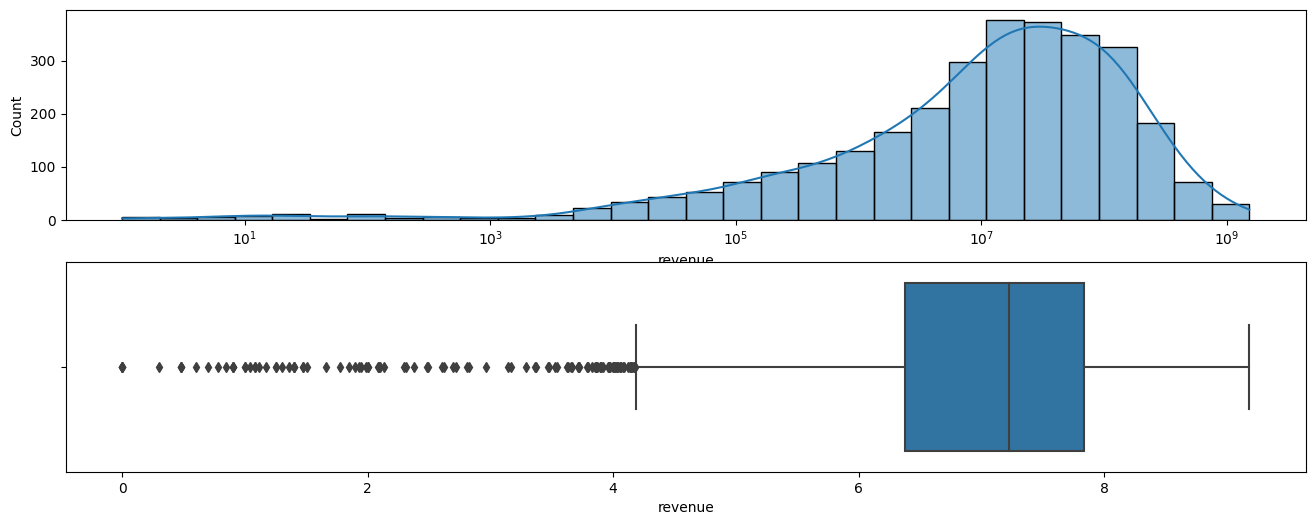

In [98]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(data=y,ax=ax[0],log_scale=True,bins=30,kde=True)
sns.boxplot(x=np.log10(y),ax=ax[1])

## Budget

distribution of the logarithm of "budget" and outliers


there's some outliers with low budget

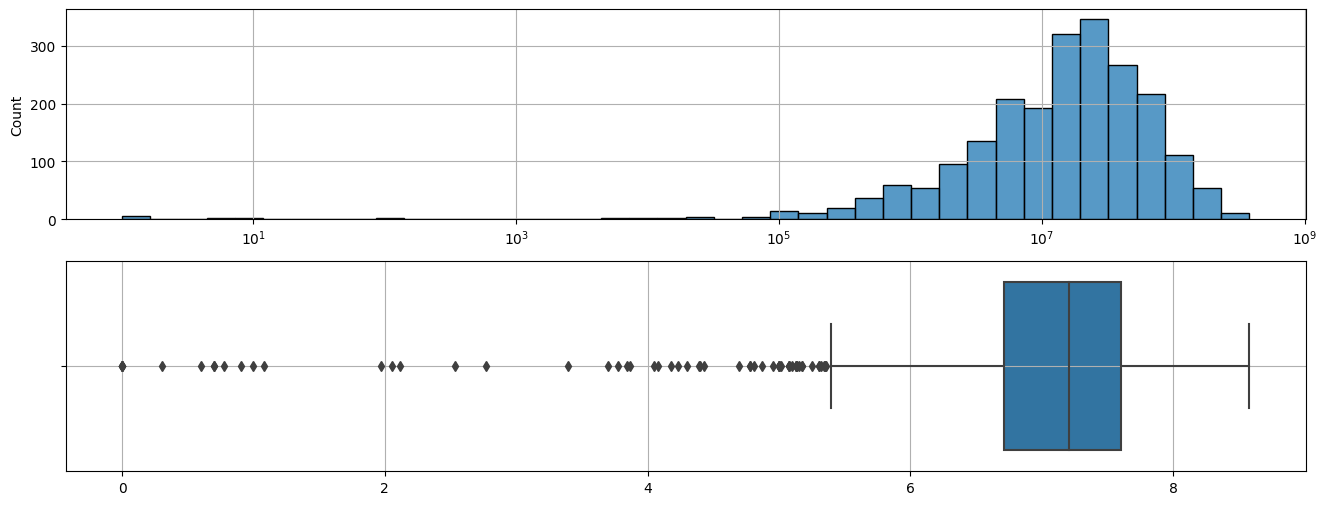

In [99]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(data=X["budget"],ax=ax[0],log_scale=True,bins=40)
sns.boxplot(x=np.log10(X["budget"]),ax=ax[1])
ax[0].set(xlabel=None);
ax[0].grid()
ax[1].set(xlabel=None);
ax[1].grid()

relation between budget and the target

looks like linear correlation

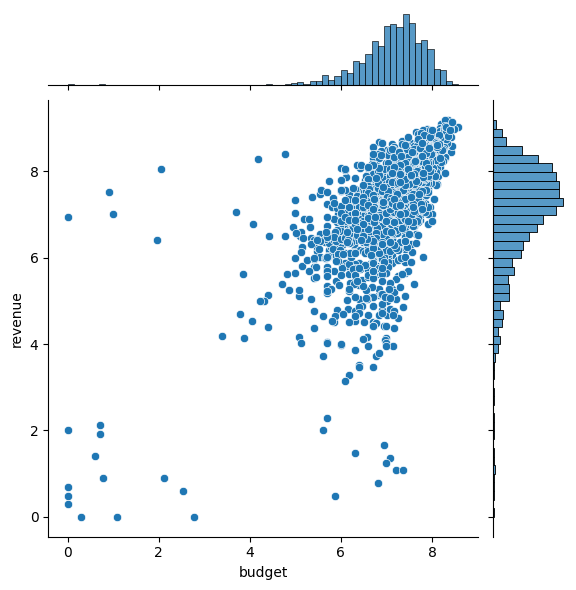

In [100]:
sns.jointplot(x=np.log10(X["budget"]),y=np.log10(y))

## Popularity

distribution of the logarithm of "popularity" and outliers


too many outliers, distribution looks narrow

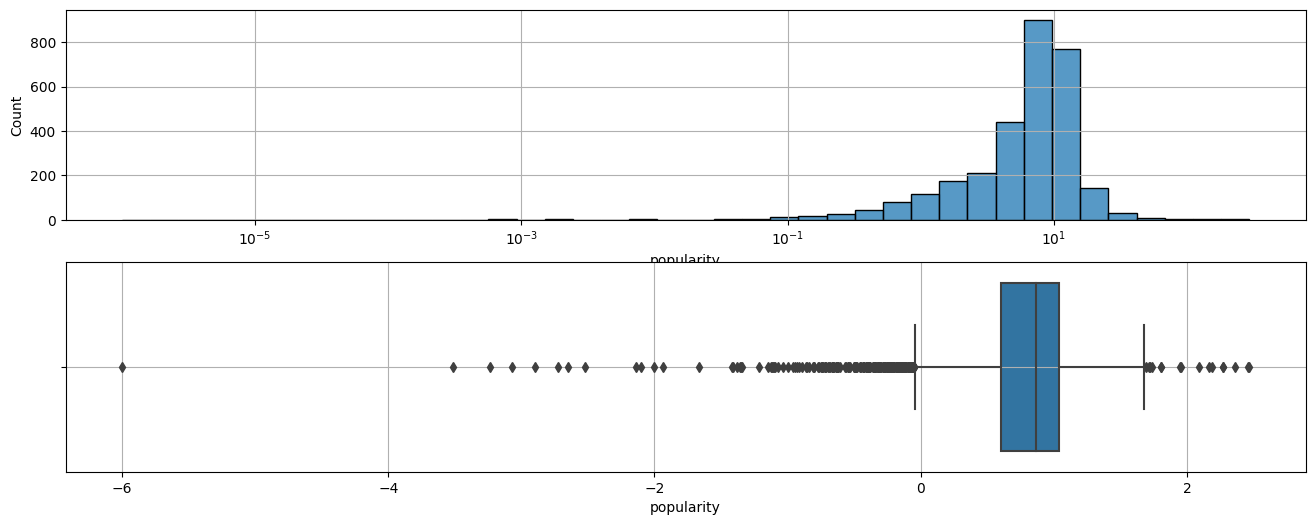

In [101]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(data=X["popularity"],ax=ax[0],log_scale=True,bins=40)
sns.boxplot(x=np.log10(X["popularity"]),ax=ax[1],)
ax[0].grid()
ax[1].grid()

relation between popularity and the target

a little correlation

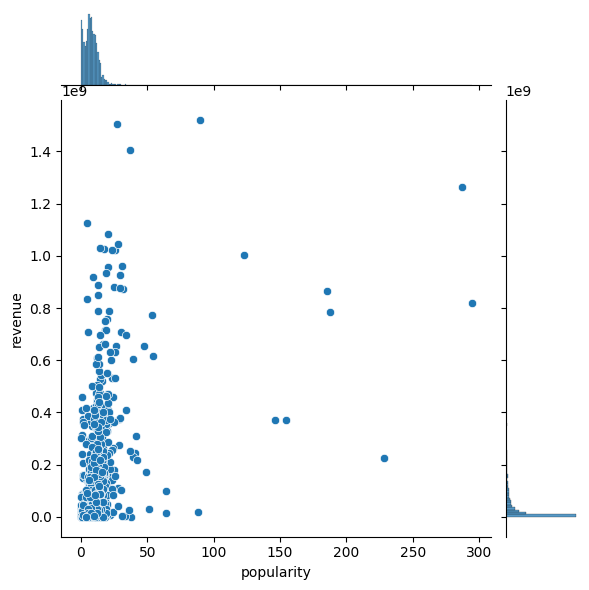

In [102]:
sns.jointplot(x=X["popularity"],y=y)

## Runtime

distribution of "runtime" and outliers




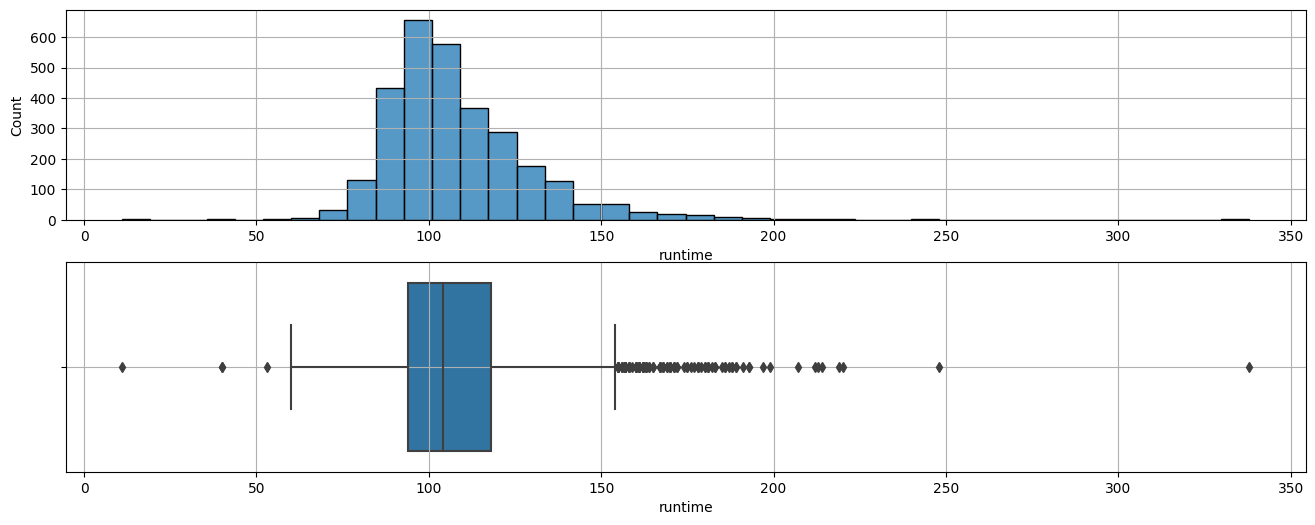

In [103]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(data=X["runtime"],ax=ax[0],bins=40)
sns.boxplot(x=X["runtime"],ax=ax[1],)
ax[0].grid()
ax[1].grid()

relation between runtime and the target

not too correlated

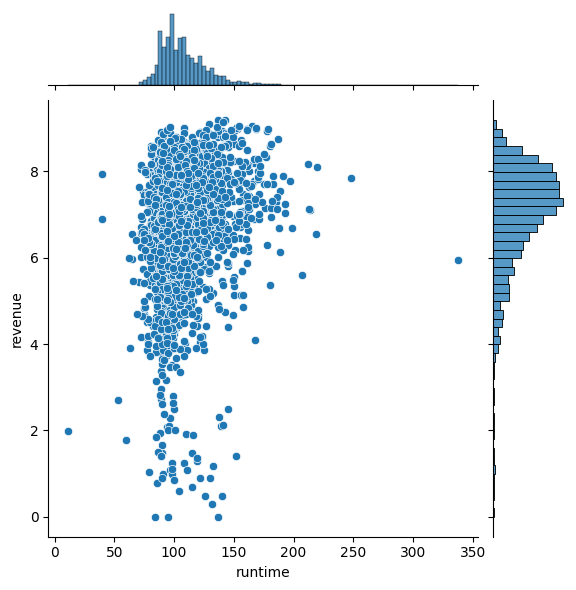

In [104]:
sns.jointplot(x=X["runtime"],y=np.log10(y))

## Differ title

this plot shows how many titles are diferent between "original title" and "title", that's because the originals are in their own languages

<Axes: xlabel='differ_title', ylabel='count'>

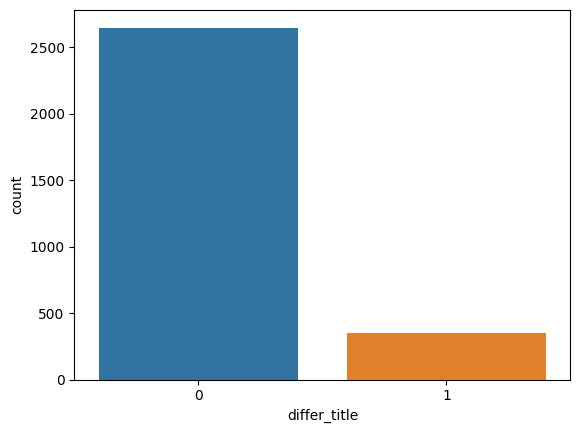

In [105]:
sns.countplot(x=X.differ_title)

we can´t see a clear relation with revenue

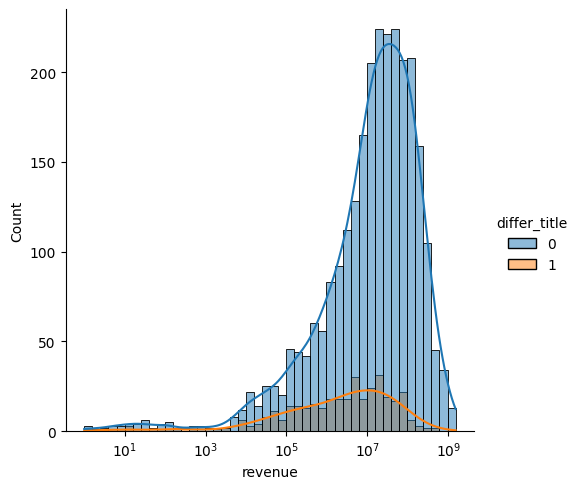

In [106]:
sns.displot(data=Xy, x="revenue",hue="differ_title", log_scale=True,kde=True)

## Has tagline

more than 15% records doesn`t have tagline

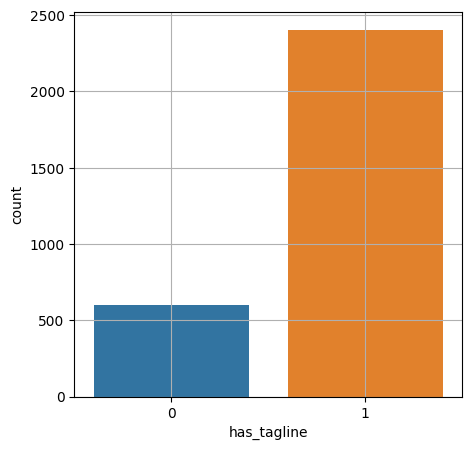

In [107]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x=X.has_tagline)
plt.grid()

the mean its different so movies with tagline tend to have highest revenue


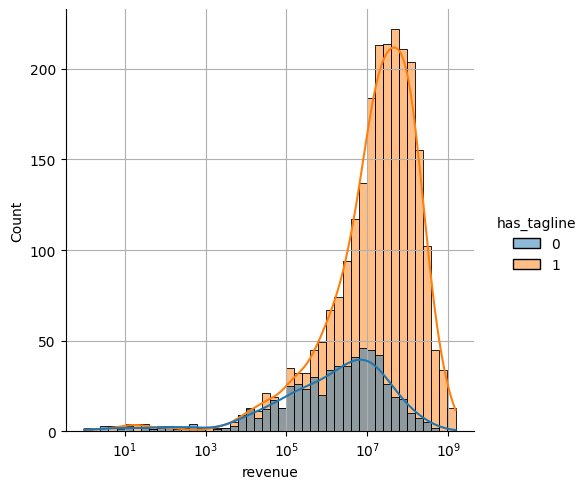

In [108]:
sns.displot(data=Xy, x="revenue",hue="has_tagline", log_scale=True,kde=True)
plt.grid()

## Has homepage

most movies doesn`t have homepage

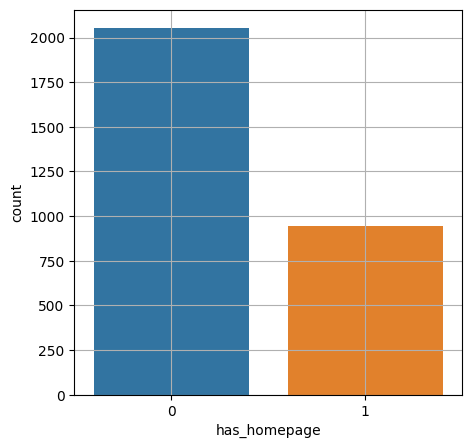

In [109]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x=X.has_homepage)
plt.grid()

movies with homepage tend to have highest revenue

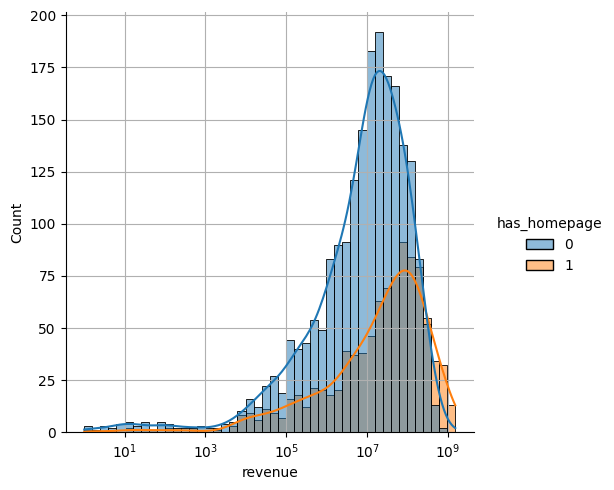

In [110]:
sns.displot(data=Xy, x="revenue",hue="has_homepage", log_scale=True,kde=True)
plt.grid()

## Original language

at first we can see that english is the predominant language

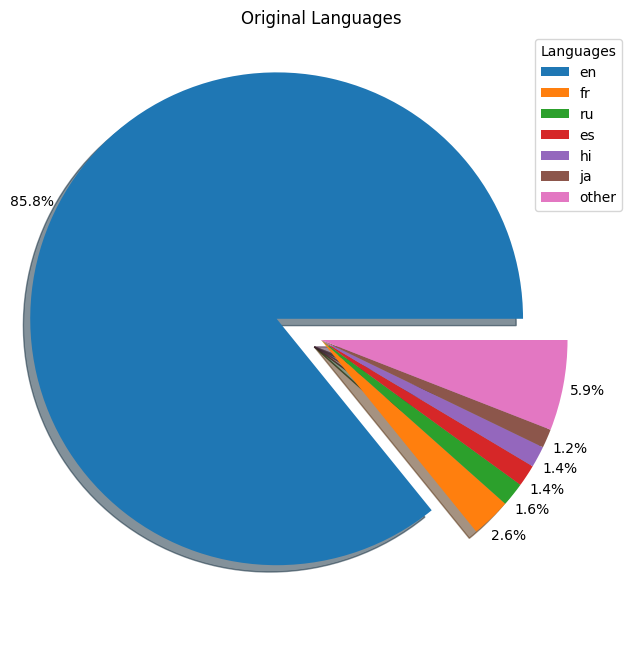

In [111]:
pie=train.original_language.value_counts(normalize=True)

pie_labls=pie.head(6).index.tolist()
pie_labls.append("other")

sizes=pie.head(6).values.tolist()
sizes.append(1-sum(sizes))

explode=[0.2,0,0,0,0,0,0]
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(x=sizes, explode=explode, autopct='%1.1f%%',shadow=True,pctdistance=1.1);
ax.legend(pie_labls,title="Languages")
ax.set_title("Original Languages");

the english language have a wide range, but the rest of all has high income, which means that in the dataset movies with other languages are only the most popular

<Axes: xlabel='original_language', ylabel='revenue'>

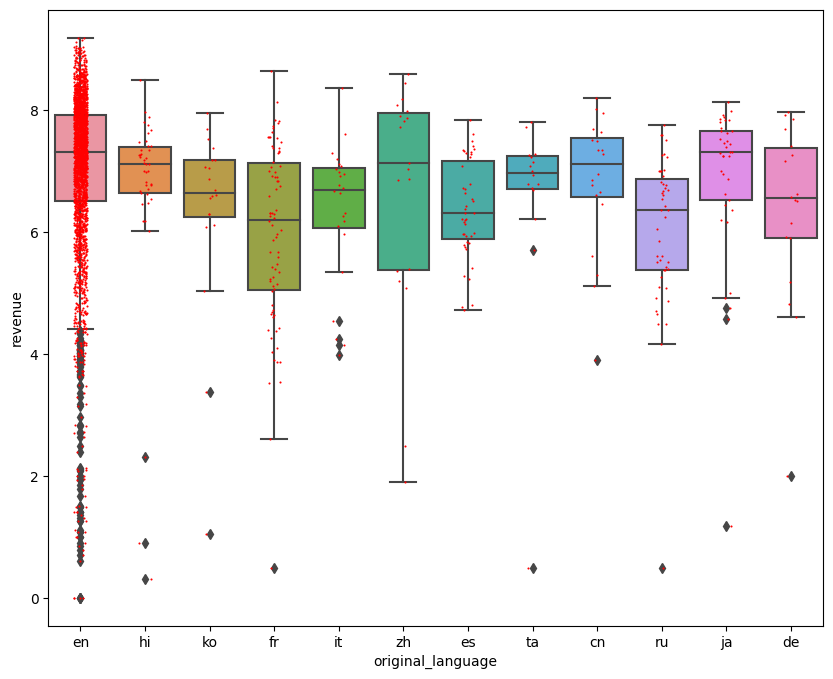

In [112]:
data=pd.concat([train.original_language,np.log10(y)],axis=1)
loc=train.original_language.value_counts().head(12).index
loc=data.original_language.isin(loc)
data=data.loc[loc]

fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(x="original_language",y="revenue",data=data,ax=ax)
sns.stripplot(x="original_language", y="revenue", data=data, color="r", size=1.5,ax=ax)

## Date year

we can see that the number of films per year increase over time

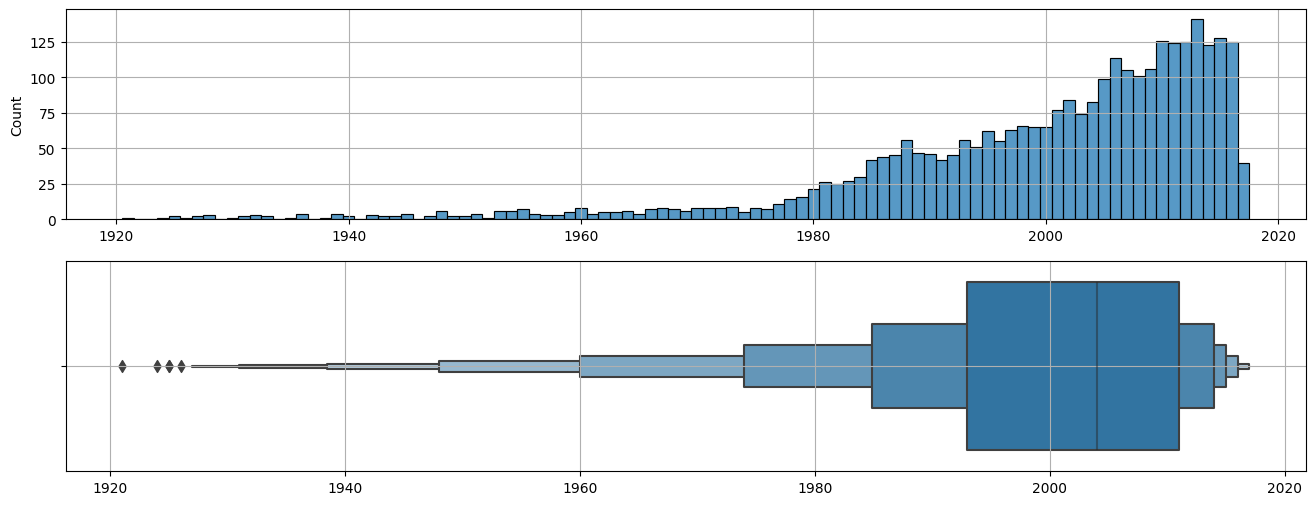

In [113]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(x=X["date_year"],ax=ax[0],discrete=True)
ax[0].set(xlabel=None)
sns.boxenplot(x=X["date_year"],ax=ax[1])
ax[1].set(xlabel=None)
ax[0].grid()
ax[1].grid()

as the number of films, revenue increases also over time

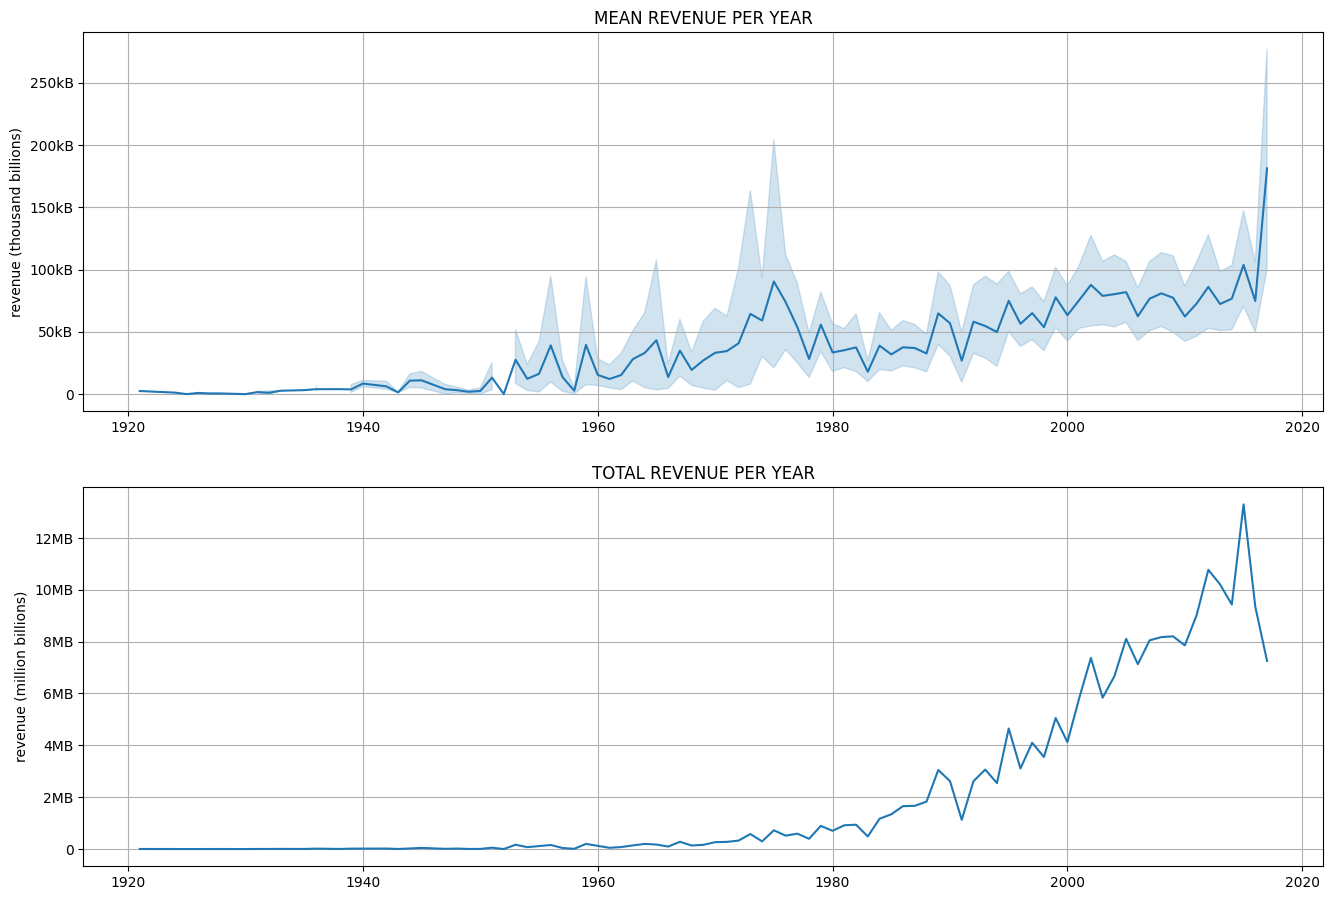

In [114]:
total_r=Xy.groupby("date_year")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.lineplot(x=X.date_year,y=y,ax=ax[0])
ax[0].set_title("MEAN REVENUE PER YEAR")
ax[0].set(xlabel=None,ylabel="revenue (thousand billions)")
ax[0].grid()

sns.lineplot(data=total_r,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER YEAR")
ax[1].set(xlabel=None,ylabel="revenue (million billions)")
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Date month

The movies in the dataset have no preference for certain release months, but January, April, and September appear to be the worst despite some outliers.

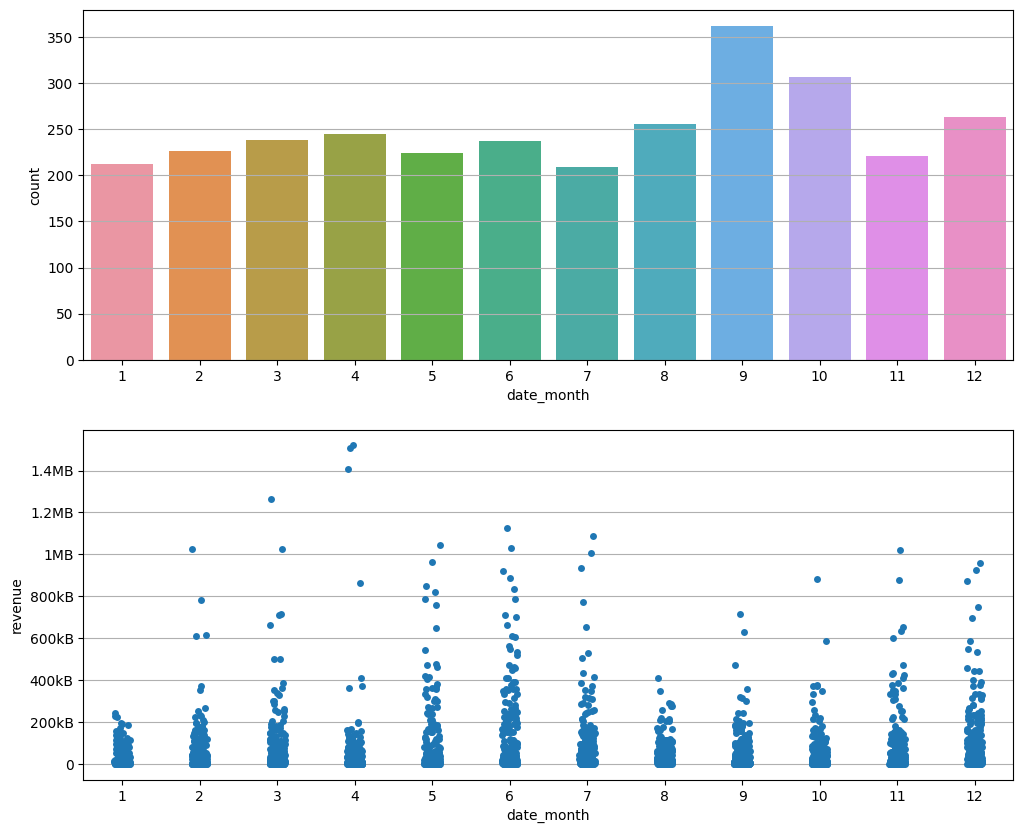

In [115]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))
ax[0].grid()
sns.countplot(x=X["date_month"],ax=ax[0],)
ax[1].grid()
sns.stripplot(x=X["date_month"],y=y,ax=ax[1],)
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

here is a clearly vision of which monts are better than others

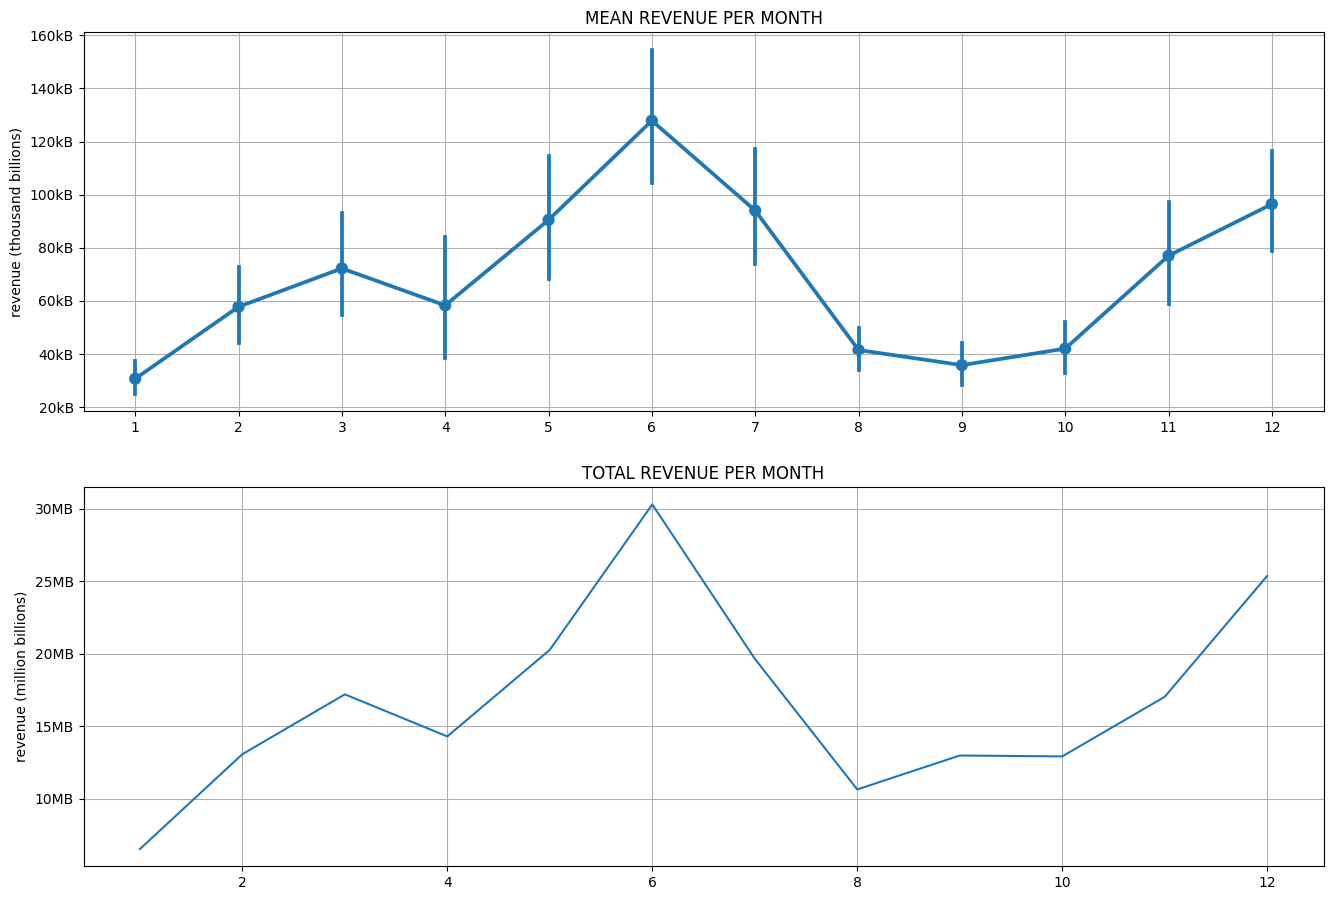

In [116]:
month_total=Xy.groupby("date_month")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="date_month",y="revenue",ax=ax[0])
ax[0].set_title("MEAN REVENUE PER MONTH")
ax[0].set(xlabel=None,ylabel="revenue (thousand billions)")
ax[0].grid()

sns.lineplot(data=month_total,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER MONTH")
ax[1].set(xlabel=None,ylabel="revenue (million billions)")
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Date day of week

surpresively wednesday is the day with highest  revenue

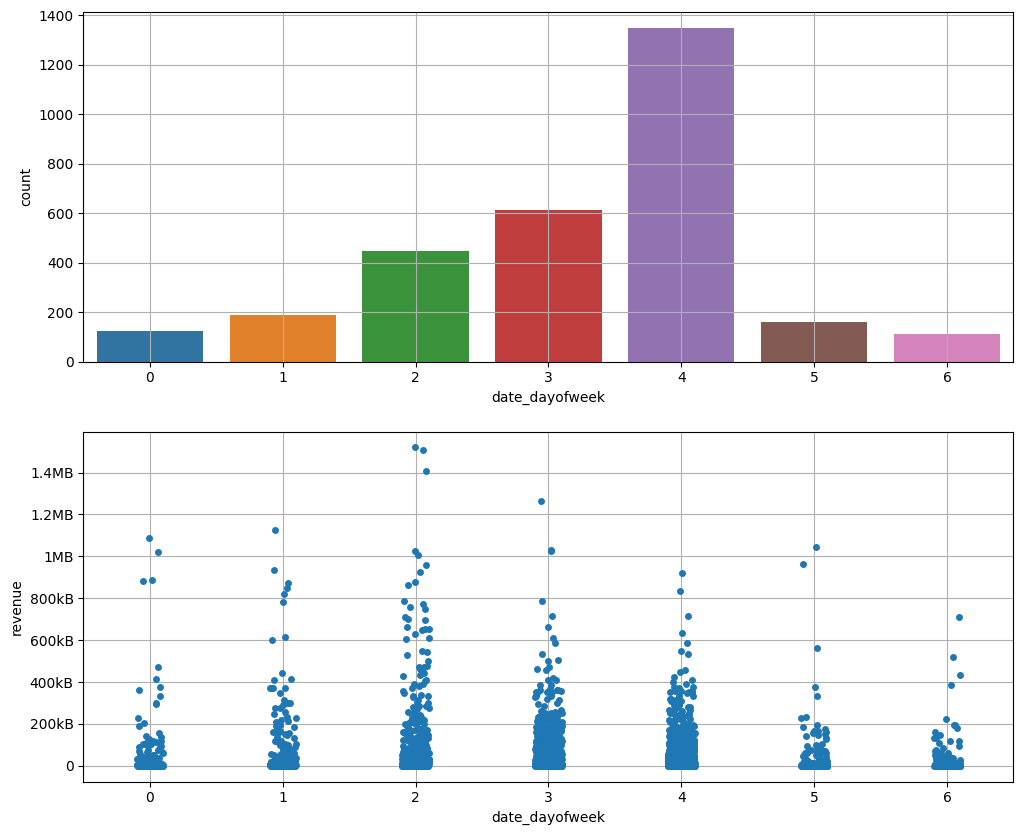

In [117]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["date_dayofweek"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["date_dayofweek"],y=y,ax=ax[1],)
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

It seems like Fridays have more total revenue, but it is because the movies in this dataset are generally released on Fridays and have too many values

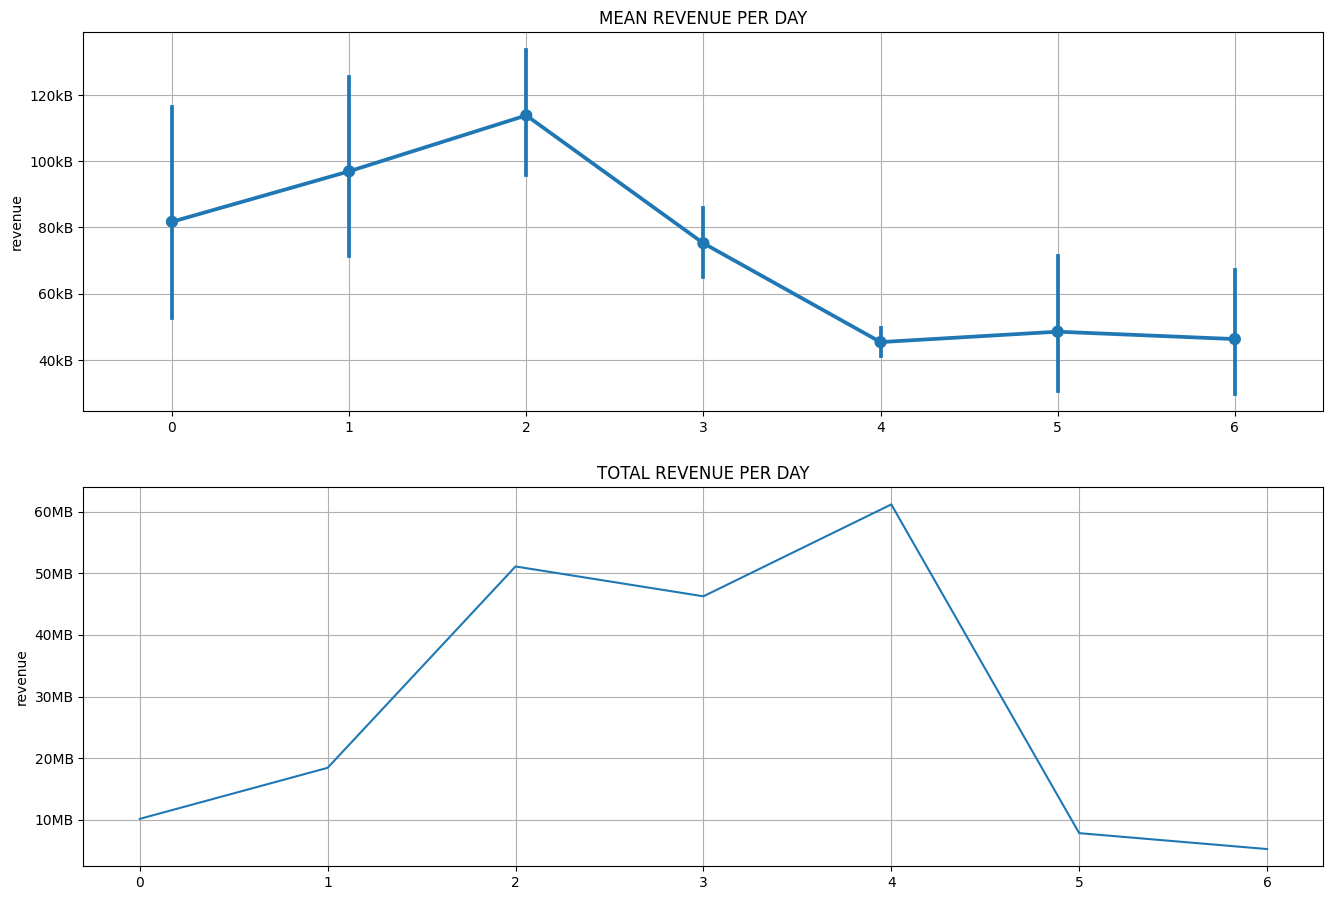

In [118]:
dayw_total=Xy.groupby("date_dayofweek")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="date_dayofweek",y="revenue",ax=ax[0])
ax[0].set_title("MEAN REVENUE PER DAY")
ax[0].set(xlabel=None)
ax[0].grid()

sns.lineplot(data=dayw_total,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER DAY")
ax[1].set(xlabel=None)
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Date day of month

days of month are evenly distributed except for 1, probably missing dates was filled at the first dat of the month

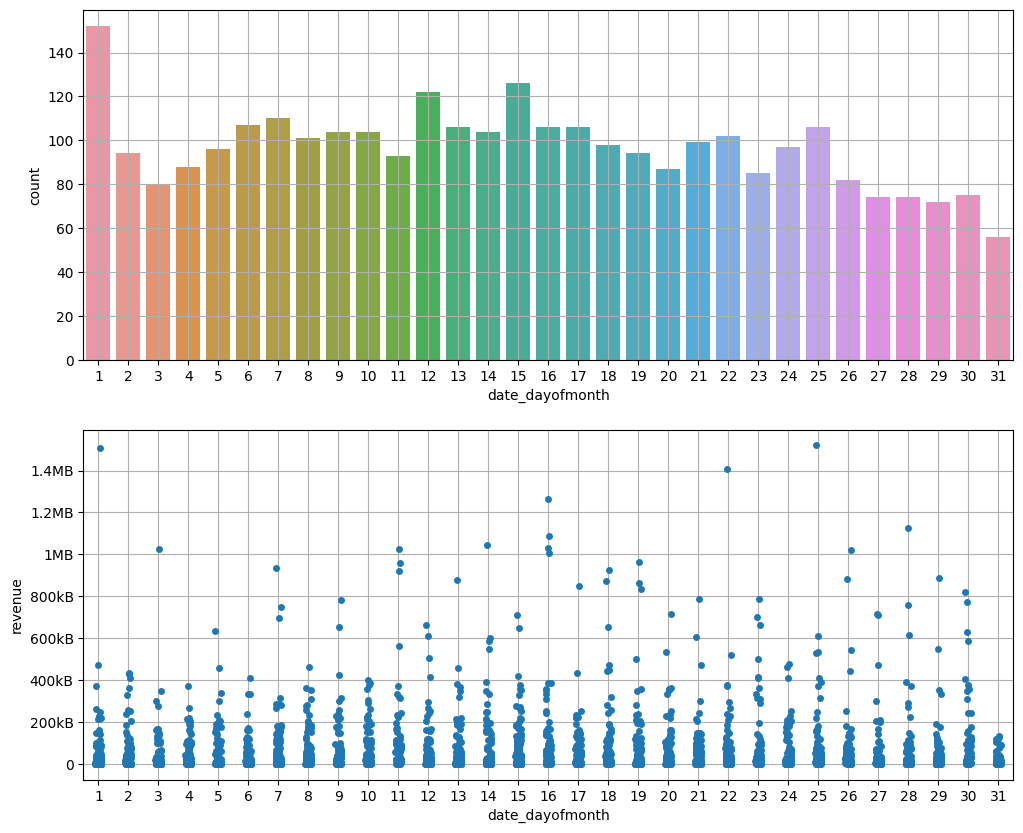

In [119]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["date_dayofmonth"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["date_dayofmonth"],y=y,ax=ax[1],)
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

films released on the mid of the month tend to have more revenue, but ther's no confidence because of variance

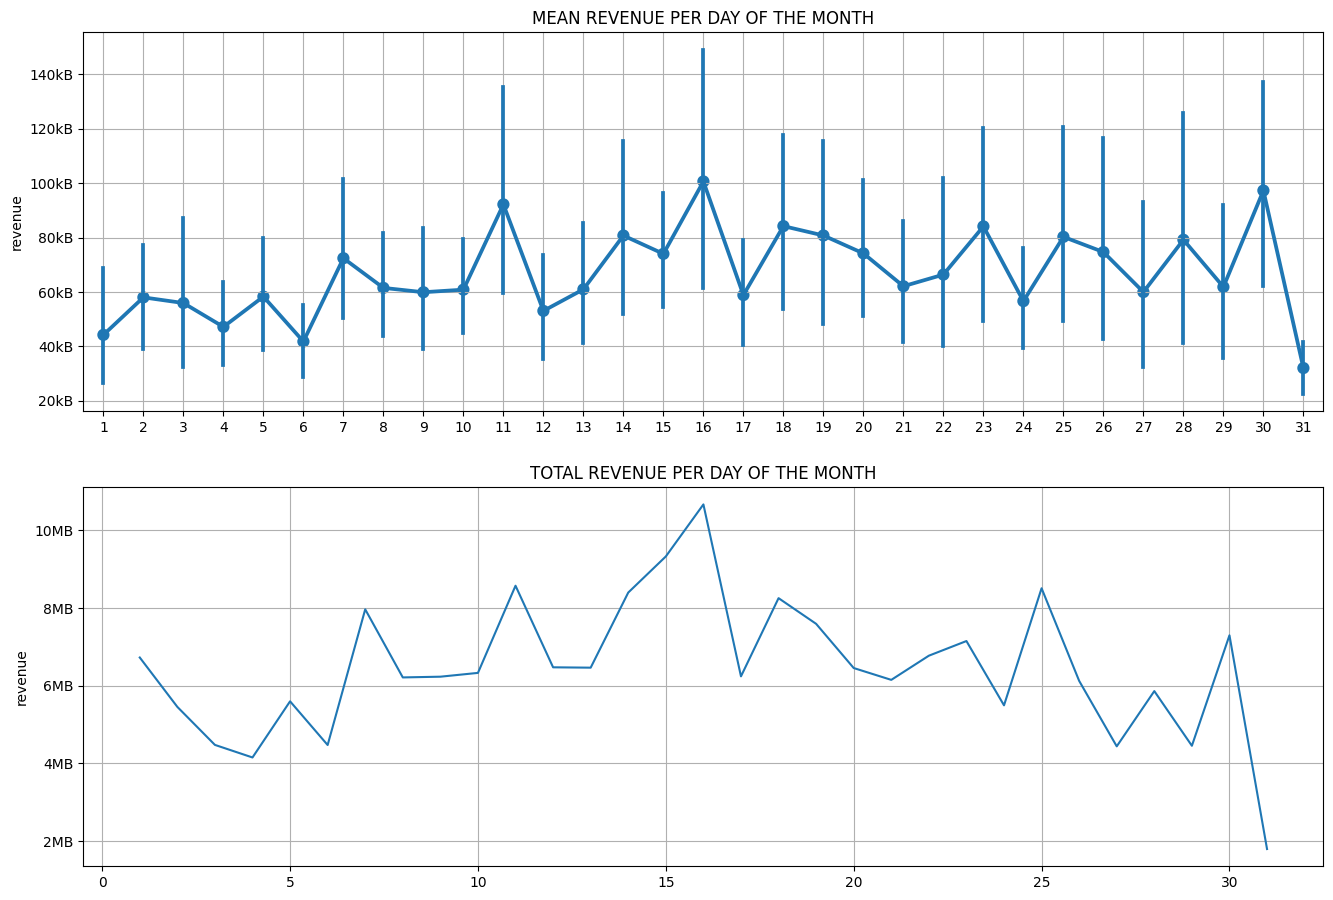

In [120]:
daym_total=Xy.groupby("date_dayofmonth")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="date_dayofmonth",y="revenue",ax=ax[0],)
ax[0].set_title("MEAN REVENUE PER DAY OF THE MONTH")
ax[0].set(xlabel=None)
ax[0].grid()

sns.lineplot(data=daym_total,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER DAY OF THE MONTH")
ax[1].set(xlabel=None)
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Date quarter

seems like the second quarter have highest revenue

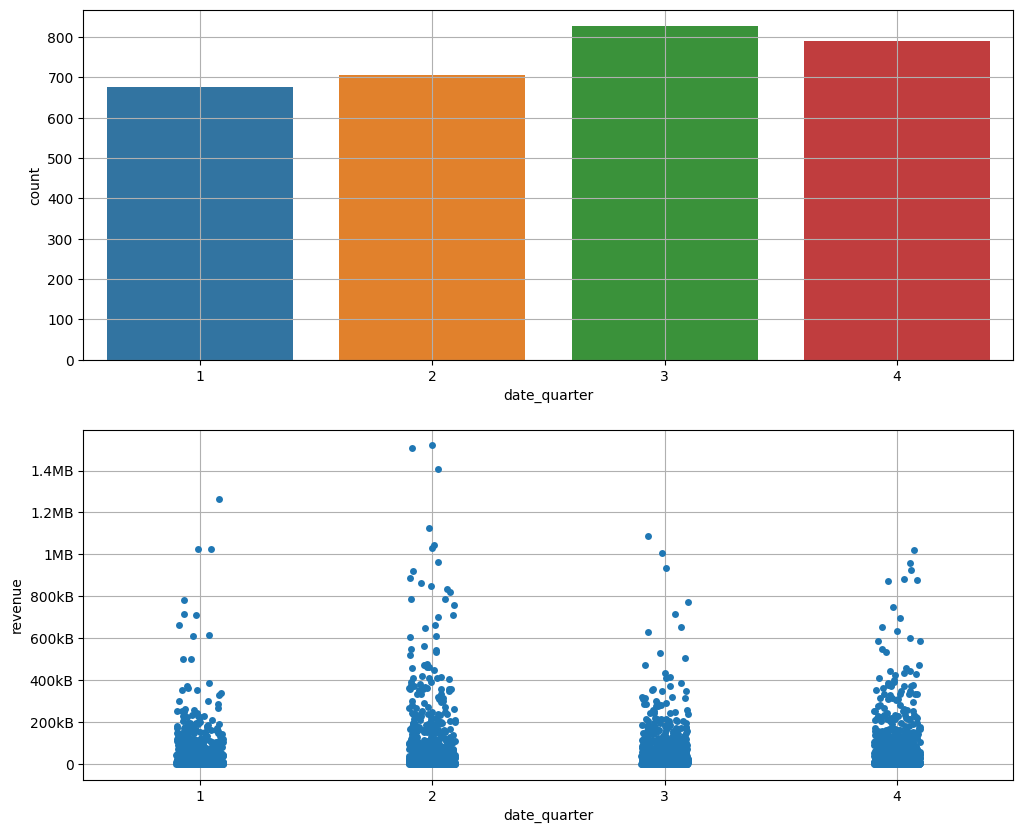

In [121]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["date_quarter"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["date_quarter"],y=y,ax=ax[1],)
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

so the second and last quarters of the year are the most likely to have high revenue

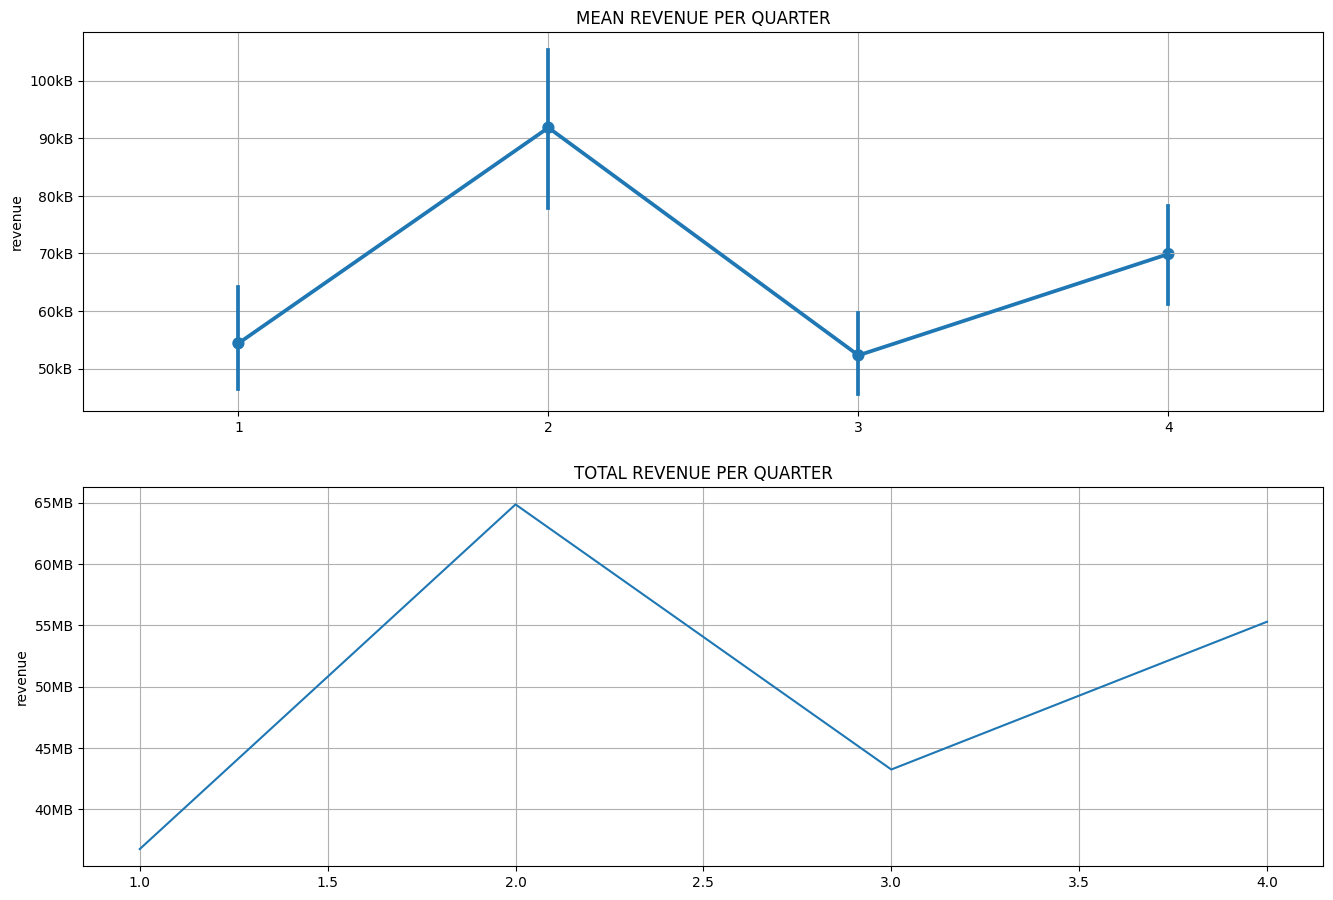

In [122]:
daym_total=Xy.groupby("date_quarter")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="date_quarter",y="revenue",ax=ax[0],)
ax[0].set_title("MEAN REVENUE PER QUARTER")
ax[0].set(xlabel=None)
ax[0].grid()

sns.lineplot(data=daym_total,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER QUARTER")
ax[1].set(xlabel=None)
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Has collection

more than 500 movies belongs to collection

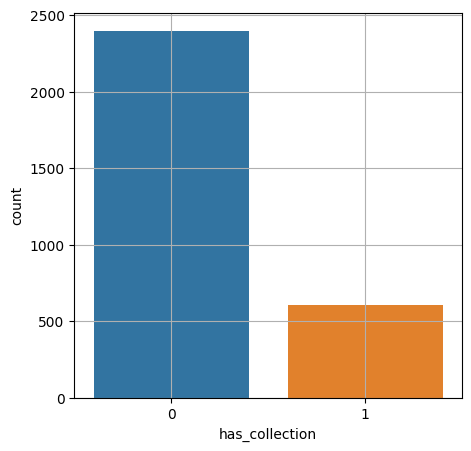

In [123]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x=X.has_collection)
plt.grid()

movies that have collection tend to have highest revenue

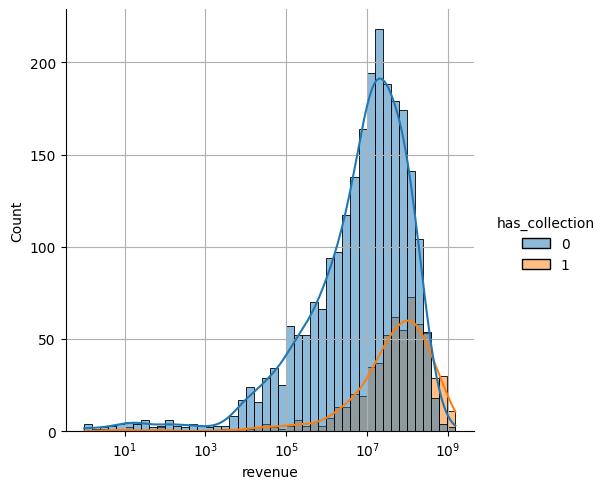

In [124]:
sns.displot(data=Xy, x="revenue",hue="has_collection", log_scale=True,kde=True)
plt.grid()

## Number of spoken languages

the number of spoken languages is not very informative despite some outliers

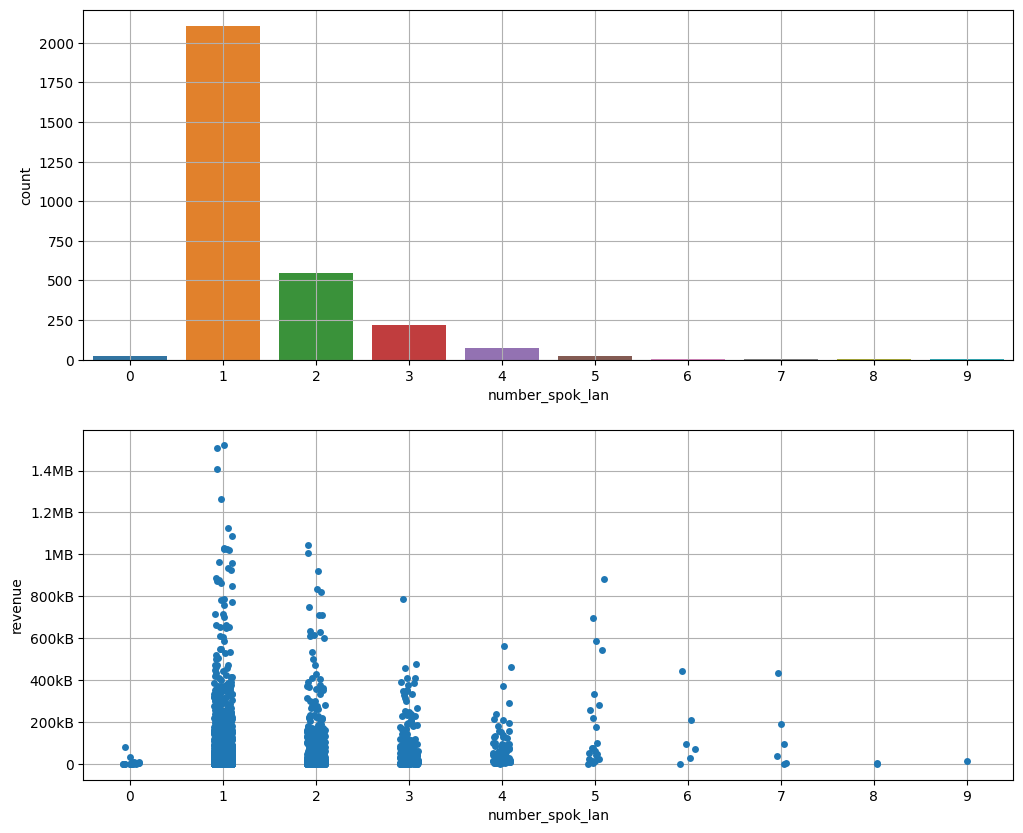

In [125]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X.number_spok_lan,ax=ax[0])
ax[0].grid()

sns.stripplot(data=Xy, y="revenue",x="number_spok_lan",ax=ax[1])
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Genres


movies with 2,3 or 4 genres tend to have higher revenue, but isn't a big correlation

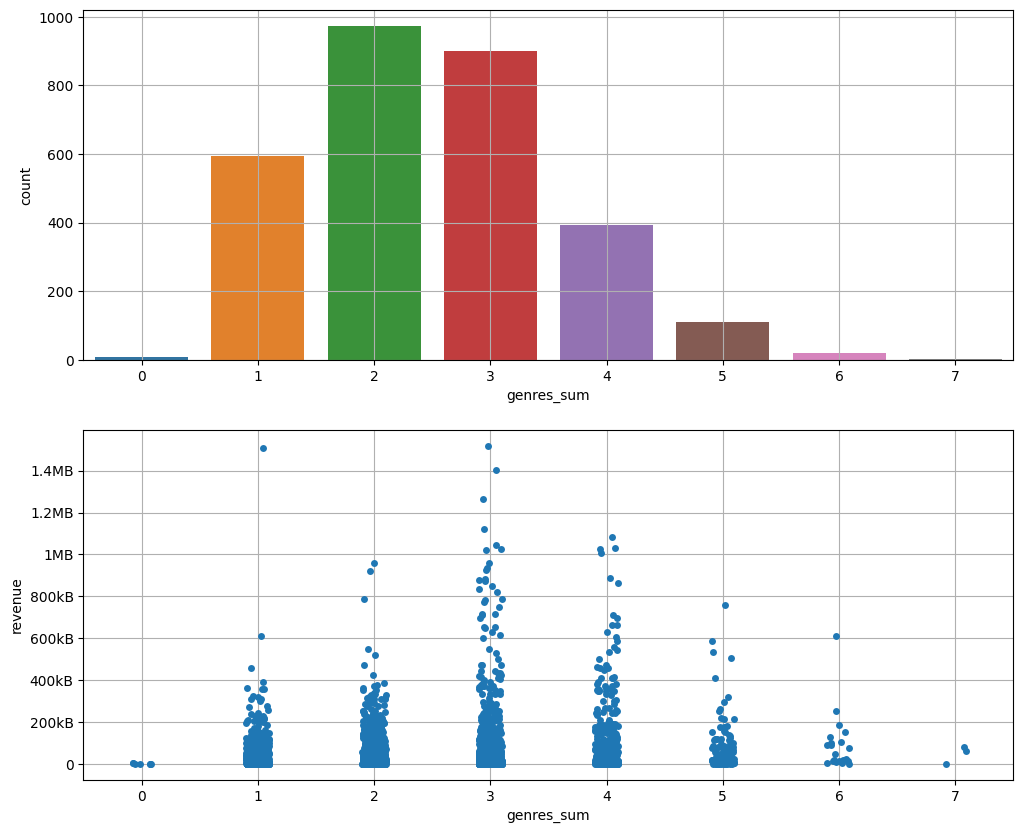

In [126]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["genres_sum"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["genres_sum"],y=y,ax=ax[1])
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

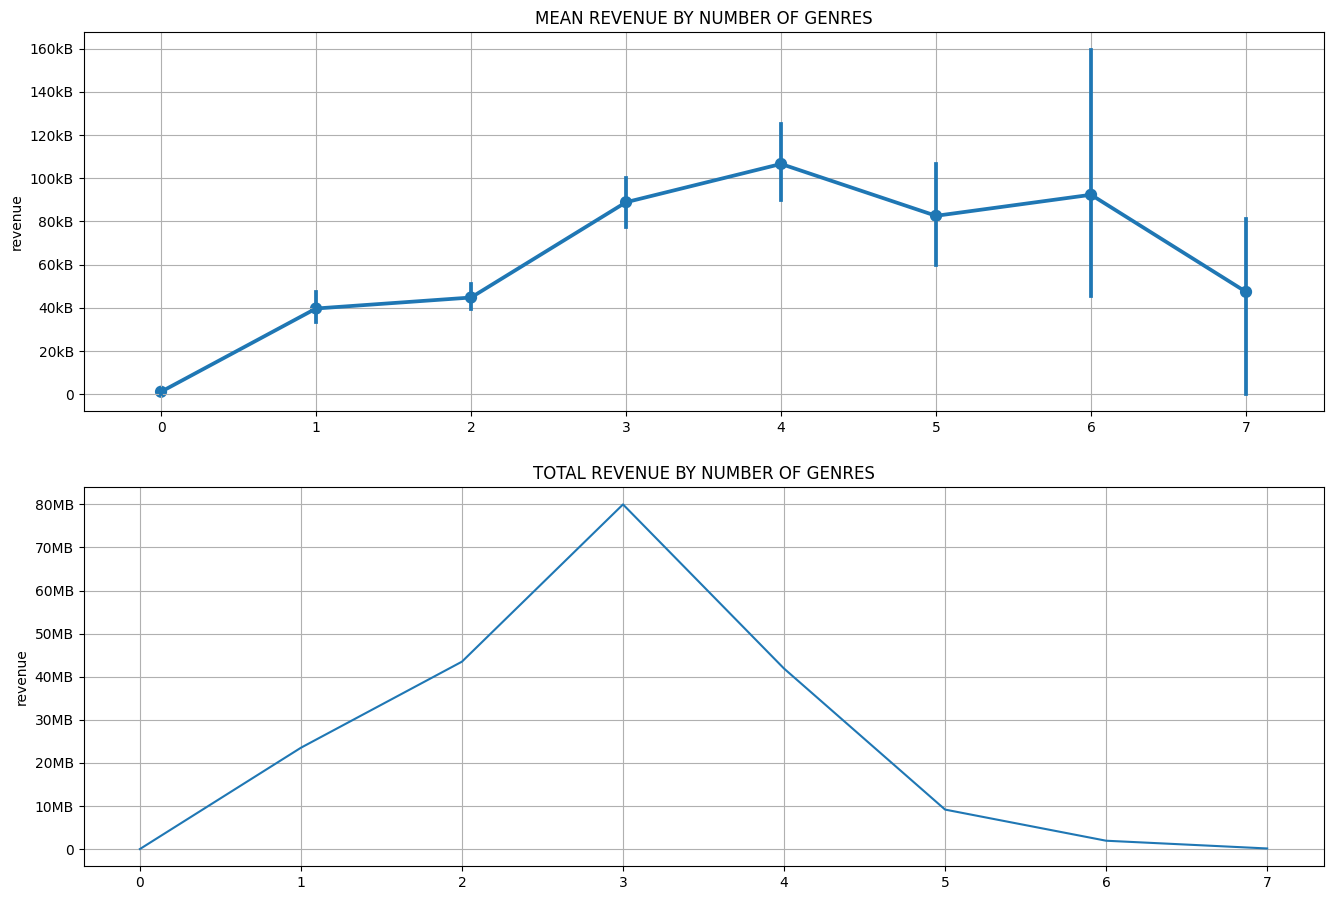

In [127]:
n_gen=Xy.groupby("genres_sum")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="genres_sum",y="revenue",ax=ax[0],)
ax[0].set_title("MEAN REVENUE BY NUMBER OF GENRES")
ax[0].set(xlabel=None)
ax[0].grid()

sns.lineplot(data=n_gen,ax=ax[1])
ax[1].set_title("TOTAL REVENUE BY NUMBER OF GENRES")
ax[1].set(xlabel=None)
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

here we can see what are the genres who leaves greatest revenue, animation, fantasy, family, science fiction, adventure and action.

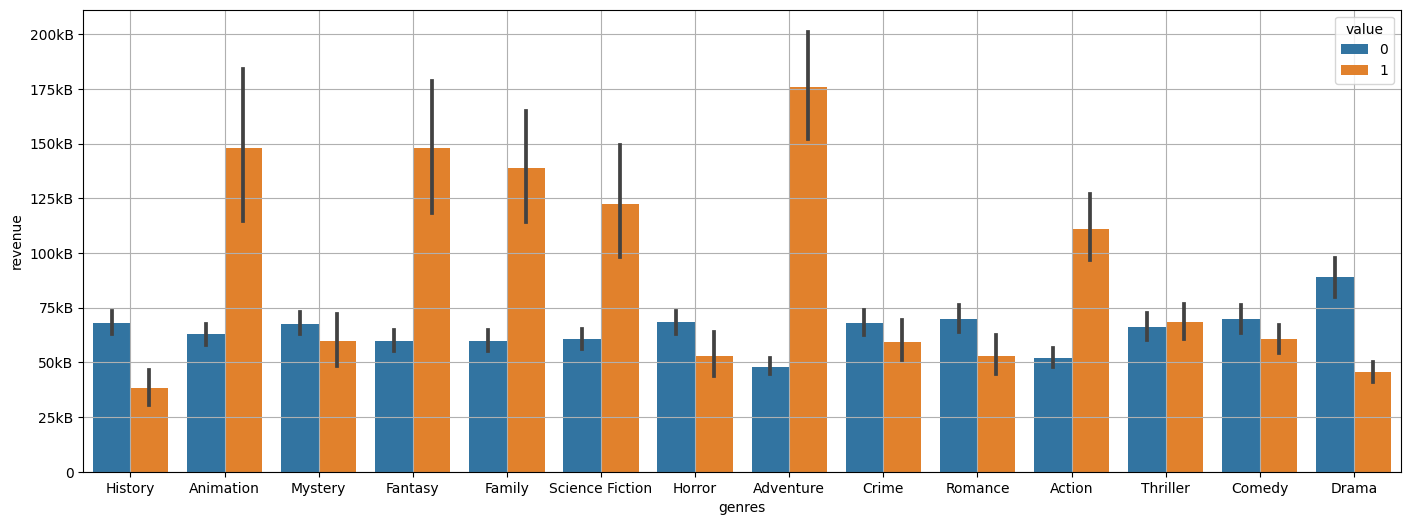

In [128]:
gens=prefix_searcher("genre_",X.columns)
gname=[]
for word in gens:
  gname.append(word.replace("genre_",""))

data=X[gens]
data.columns=gname
data=pd.concat([data,y],axis=1)
data=pd.melt(data,id_vars="revenue",var_name="genres")

fig, ax = plt.subplots(figsize=(17,6))
sns.barplot(data=data,x="genres",y="revenue",hue="value",ax=ax)
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.grid()

## Production companies

usually just 2 companies leaves more revenue, but there's no a clearly correlation

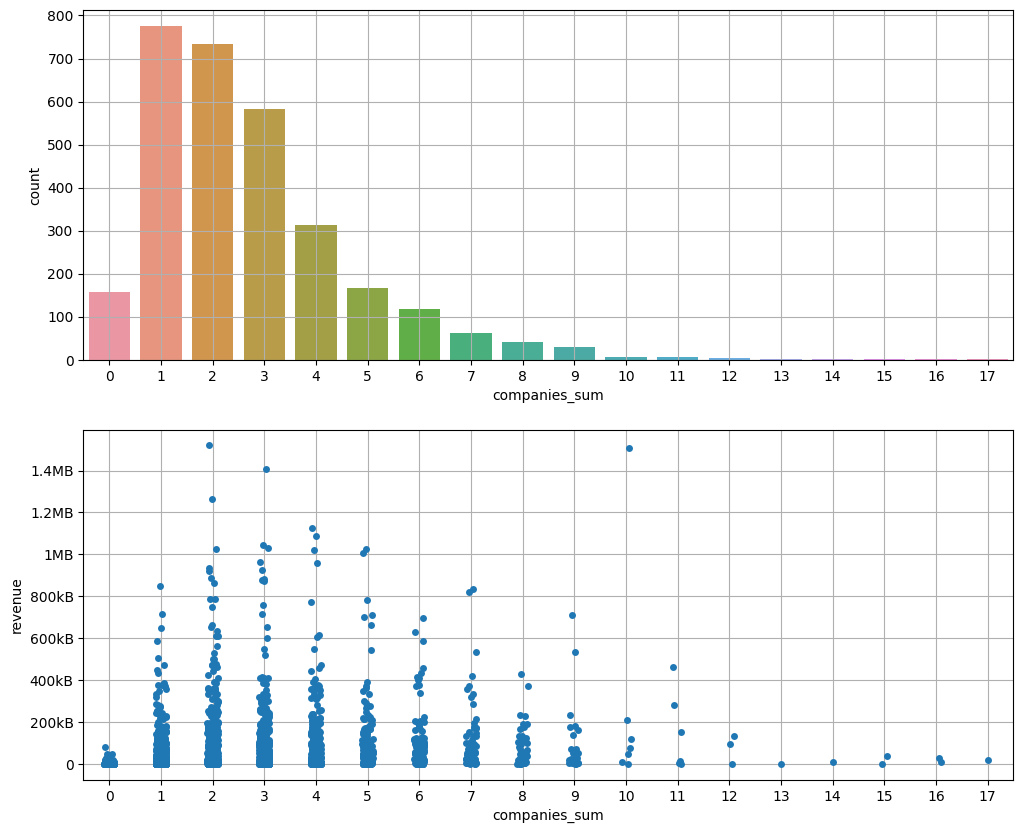

In [129]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["companies_sum"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["companies_sum"],y=y,ax=ax[1])
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

we can see that movies from Disney differ a lot from the others, with highest revenue

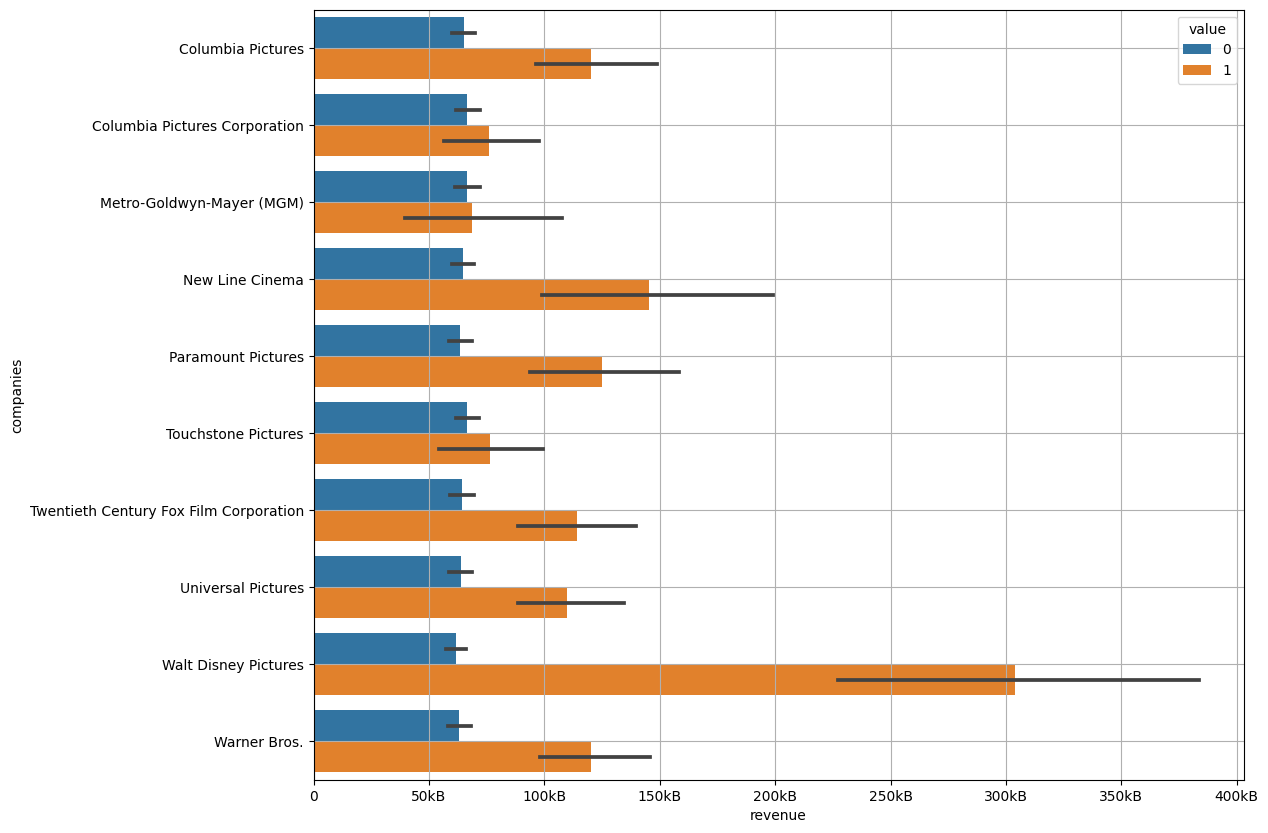

In [130]:
companies=prefix_searcher("comp_",X.columns)
pcompname=[]
for word in companies:
  pcompname.append(word.replace("comp_",""))

data=X[companies]
data.columns=pcompname
data=pd.concat([data,y],axis=1)
data=pd.melt(data,id_vars="revenue",var_name="companies")

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(data=data,y="companies",x="revenue",hue="value")
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.grid()

## Production countries

almost all films have  just 1 production country, so its not informative at all

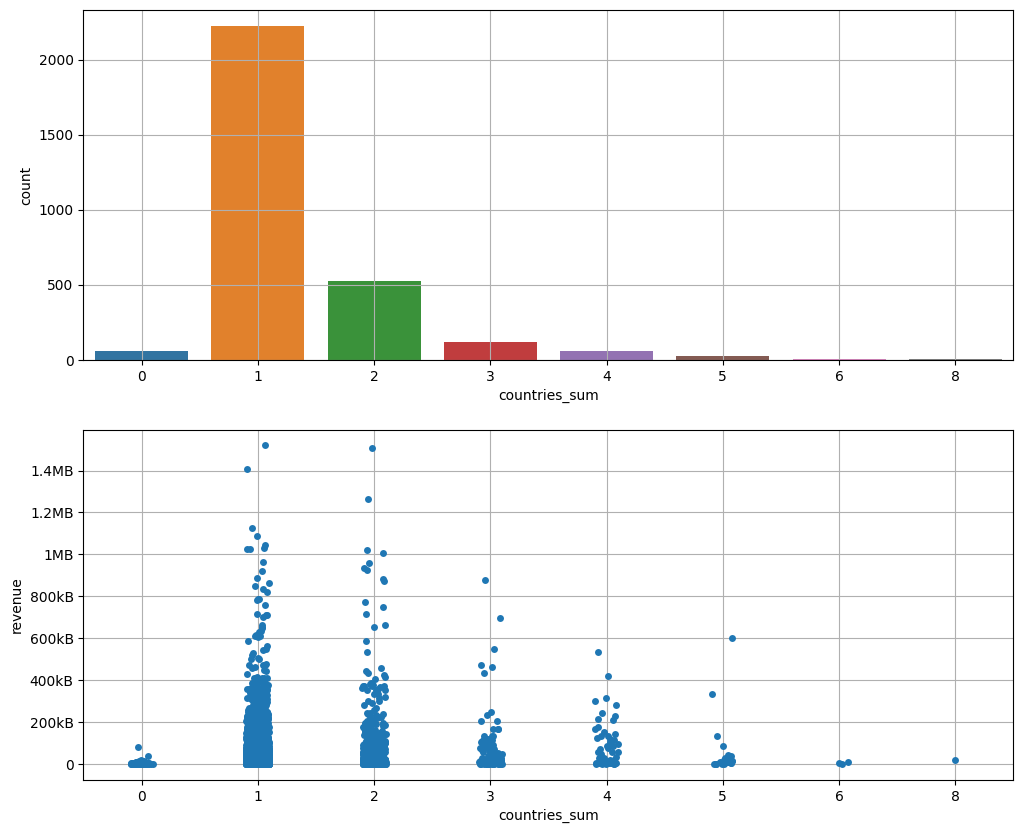

In [131]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["countries_sum"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["countries_sum"],y=y,ax=ax[1])
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

there is too much variation except in the US, which has a clear difference in income when a movie is produced there

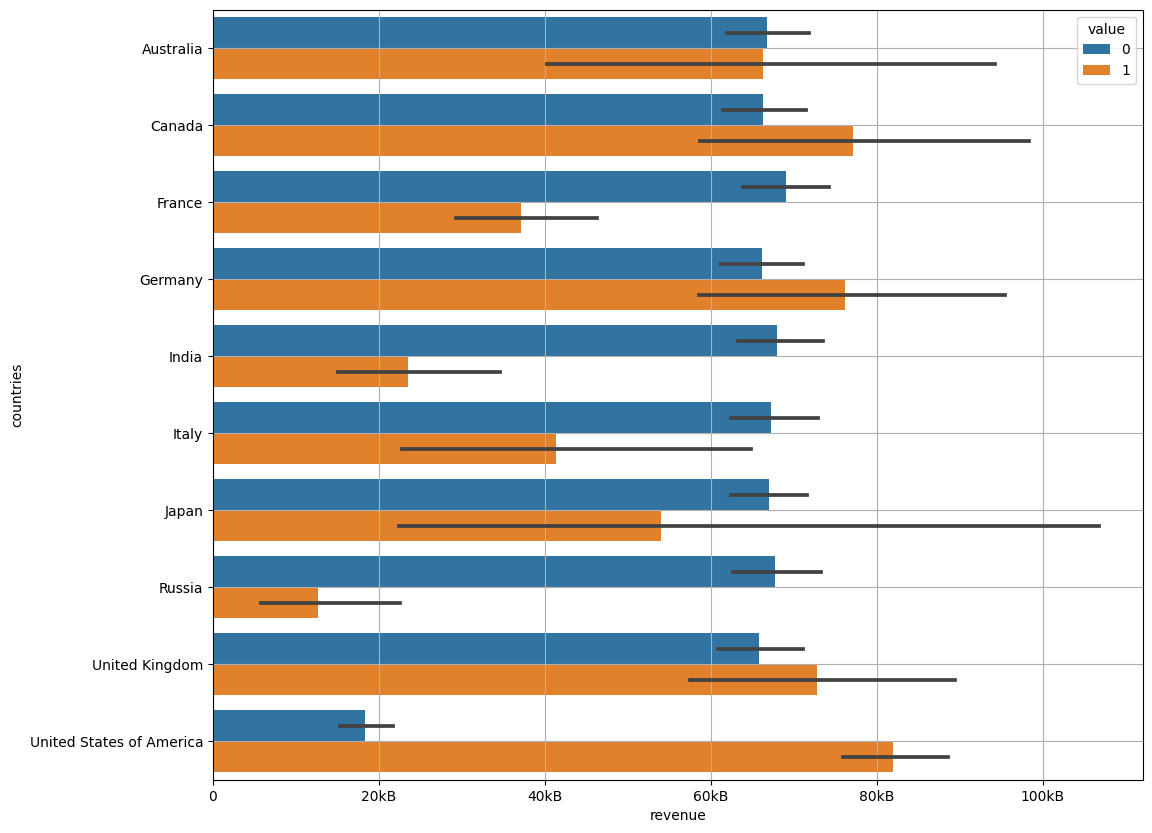

In [132]:
countries=prefix_searcher("country_",X.columns)
pcounname=[]
for word in countries:
  pcounname.append(word.replace("country_",""))

data=X[countries]
data.columns=pcounname
data=pd.concat([data,y],axis=1)
data=pd.melt(data,id_vars="revenue",var_name="countries")

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(data=data,y="countries",x="revenue",hue="value")
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.grid()

## NLP visualization

In [133]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [134]:
# compute the first n number of ngrams sorted by its count
def get_firstn_ngrams(text, stop_words="english",ngram_range=(1,1), n=10):
  from sklearn.feature_extraction.text import CountVectorizer
  vectorizer = CountVectorizer(stop_words = stop_words, ngram_range=ngram_range)
  bow = vectorizer.fit_transform([text])
  count = pd.DataFrame(data=bow.toarray().T, index=vectorizer.get_feature_names_out(), columns=["Count"])
  first_n = count.sort_values(by="Count", ascending=False)[:n]
  return first_n

### Overview

we can see which words are the most used in the reviews, its interesting that "find" and "life" are the most common, as a philosophical approach

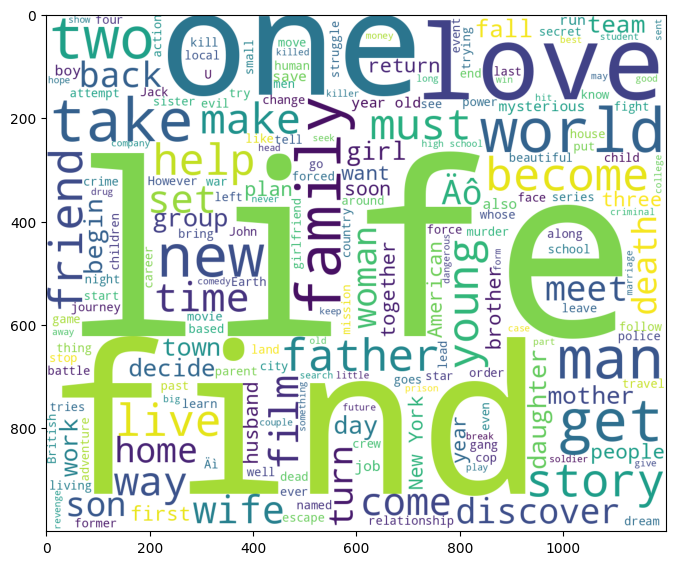

In [135]:
over_text = " ".join(train.overview.fillna(""))

fig = plt.figure(figsize = (8, 8))
wc = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000,stopwords=stopwords).generate(over_text)
plt.imshow(wc);

the top bigrams are about places and events

In [136]:
get_firstn_ngrams(over_text,ngram_range=(2,2),stop_words=stopwords)

Count
new york       115
year old       108
high school     65
los angeles     56
falls love      53
small town      45
young man       44
one day         41
world war       41
york city       38

trigrams are like bigrams but with ages description as well

In [137]:
get_firstn_ngrams(over_text,ngram_range=(3,3),stop_words=stopwords)

Count
new york city        38
world war ii         24
year old son         12
12 year old          11
based true story      9
year old girl         9
10 year old           8
film tells story      8
13 year old           7
year old boy          7

### Tagline

tagline is similar to overview, a trending topic seems to be the love

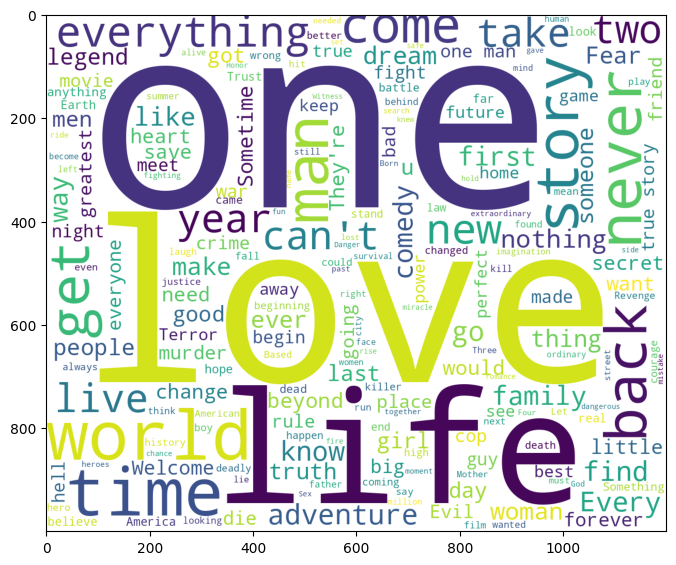

In [138]:
tag_text = " ".join(train.tagline.fillna(""))

fig = plt.figure(figsize = (8, 8))
wc = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000,stopwords=stopwords).generate(tag_text)
plt.imshow(wc);

bigrams are typical descriptions

In [139]:
get_firstn_ngrams(tag_text,ngram_range=(2,2),stop_words=stopwords)

Count
one man            23
true story         23
love story         12
motion picture      9
second chance       9
get ready           9
best friends        7
one night           7
life love           7
one woman           7

some trigrams repeat few times

In [140]:
get_firstn_ngrams(tag_text,ngram_range=(3,3),stop_words=stopwords)

Count
based true story                4
incredible true story           4
far would go                    4
new york city                   4
dreams come true                3
beyond imagination love         3
one night stands                3
every legend beginning          2
experience grueling terror      2
whole world laughs              2

### Title

we can see that there is sexism in the titles, cause there is more presence of the male gender

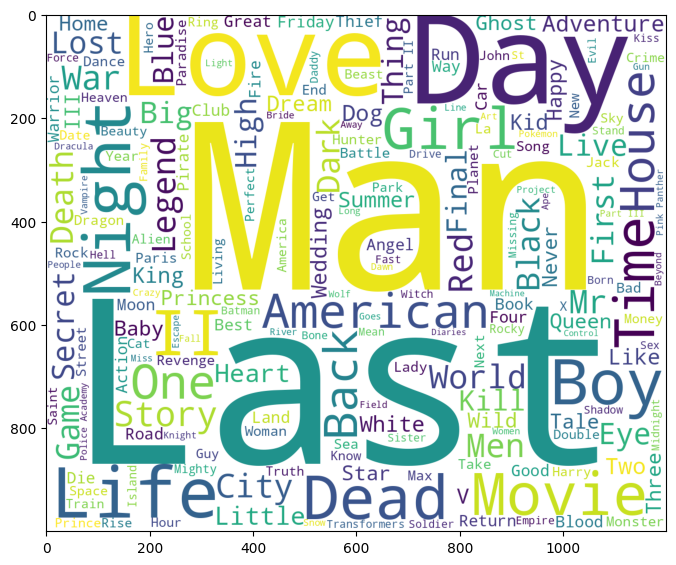

In [141]:
tit_text = " ".join(train.title.fillna(""))

fig = plt.figure(figsize = (8, 8))
wc = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000,stopwords=stopwords,random_state=0).generate(tit_text)
plt.imshow(wc);

bigrams are compose of collection movies

In [142]:
get_firstn_ngrams(tit_text,ngram_range=(2,2),stop_words=stopwords)

Count
part ii                  6
friday 13th              6
police academy           5
part iii                 5
pink panther             5
paranormal activity      4
planet apes              4
star trek                4
13th part                4
ice age                  4

### Keywords

In [143]:
keywords_dataframe

id                  name  original_id
0        4379.0           time travel            1
1        9663.0                sequel            1
2       11830.0               hot tub            1
3      179431.0  duringcreditsstinger            1
4        2505.0            coronation            2
...         ...                   ...          ...
21951    8508.0                 party         3000
21952   10562.0            on the run         3000
21953   11612.0              hospital         3000
21954   13008.0                 train         3000
21955   13130.0              teenager         3000

[21956 rows x 3 columns]

it seems pretty balanced, just typical keywords

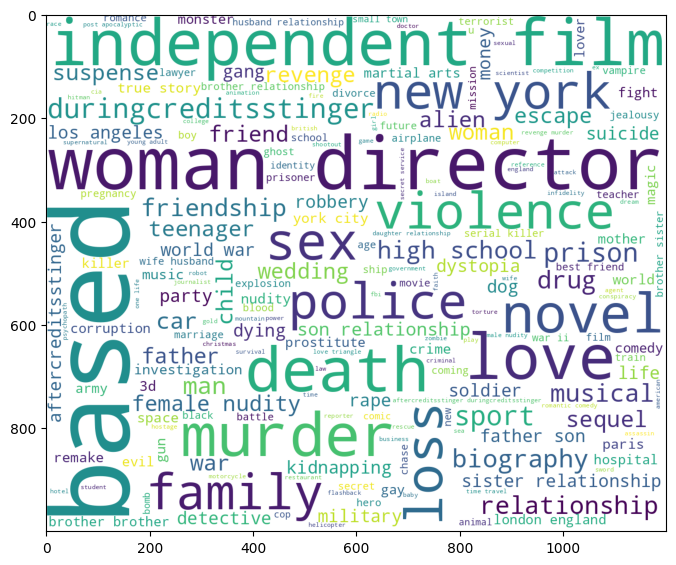

In [144]:
key_text = " ".join(keywords_dataframe.name.fillna(""))

fig = plt.figure(figsize = (8, 8))
wc = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000,stopwords=stopwords).generate(key_text)
plt.imshow(wc);

bigrams surprisingly talk about woman more than men

In [145]:
get_firstn_ngrams(key_text,ngram_range=(2,2),stop_words=stopwords)

Count
woman director         175
independent film       155
based novel            111
new york                92
high school             70
female nudity           53
son relationship        52
los angeles             50
sister relationship     48
world war               47

frequent topics are about relationship between persons

In [146]:
get_firstn_ngrams(key_text,ngram_range=(3,3),stop_words=stopwords)

Count
father son relationship          44
new york city                    40
based true story                 35
brother brother relationship     34
world war ii                     32
brother sister relationship      30
wife husband relationship        29
love one life                    23
superhero based comic            21
based play musical               19

# **FEATURE ENGINEERING**

for feature selection gotta use mutual information score

In [147]:
# function to see the mutual information score for regressions
from sklearn.feature_selection import mutual_info_regression

def mi_scores(X, y, discrete_features="auto"):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

and to evaluate performance i will use cross validation

In [148]:
# funtion to score the performance of a dataset based on random forest algorithm
# the evaluation metric is Root Mean Squared Logarithmic Error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

def RMSLE(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))

RMSLE_scorer = make_scorer(RMSLE,greater_is_better=False)

def score_dataset(X, y, model=RandomForestRegressor()):
    kf = KFold(n_splits=5, shuffle=True)
    score = cross_val_score( model, X, y, cv=kf, scoring=RMSLE_scorer )
    return print( f"{-score.mean():.4f} ± {score.std():.4f}" )

In [149]:
# plot pca explained variance ratio with cumulative and individual variance
def plot_evr_pca(df,figsize=(10,7)):
  from sklearn.decomposition import PCA
  pca=PCA(n_components=None)
  df_pca=pca.fit_transform(df)
  component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
  y=pca.explained_variance_ratio_
  cumsum_y=np.cumsum(y)
  # figure
  plt.figure(figsize=figsize)
  sns.lineplot(x=component_names,y=y,marker="o")
  sns.lineplot(x=component_names,y=cumsum_y,marker="o")
  plt.legend(["variance","cumulative variance"])
  plt.xlabel("Principal components")
  plt.ylabel("explained variance ratio")
  plt.yticks(np.arange(0,1.1,0.1))
  plt.grid()


## Missing values

the remainder NaN values affter transform X are:

In [150]:
null=X.isna().sum()
null[null>0]

budget     812
runtime     14
dtype: int64

now we are going to look wich is the best imputation for missing values

In [151]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

si_mean=SimpleImputer(strategy="mean")
si_median=SimpleImputer(strategy="median")
si_mfre=SimpleImputer(strategy="most_frequent")
knn=KNNImputer()

BUDGET=X[["budget"]].copy()
BUDGET["budget_random"] = X.budget.map(lambda x: (np.random.uniform(1, X["budget"].max())) if np.isnan(x) else x)
BUDGET["nan_budget"] = X.budget.isna().astype(int)
BUDGET["budget_fill_0"] = X.budget.fillna(0)
BUDGET["budget_fill_ffill"] = X.budget.fillna(method="ffill")
BUDGET["budget_fill_mean"] = si_mean.fit_transform(X[["budget"]])
BUDGET["budget_fill_median"] = si_median.fit_transform(X[["budget"]])
BUDGET["budget_fill_mfreq"] = si_mfre.fit_transform(X[["budget"]])
BUDGET["budget_fill_knn"] = knn.fit_transform(X[["budget"]])

using mutual information we can see there's no bigger diference, so for missing values i will use the median

In [152]:
mi_scores(BUDGET.drop("budget",axis=1),y)

budget_fill_0         0.408825
budget_fill_median    0.407908
budget_fill_mfreq     0.401159
budget_fill_knn       0.400347
budget_fill_mean      0.400248
budget_random         0.251099
budget_fill_ffill     0.238227
nan_budget            0.112819
Name: MI Scores, dtype: float64

## Feature selection


we can see that only the first two features are strongly correlated, else have 5% or less

In [153]:
mi_scores(X.fillna(0),np.log1p(y)).head(10)

budget                              0.412274
popularity                          0.256991
companies_sum                       0.061546
has_collection                      0.055763
country_United States of America    0.052338
original_language                   0.048718
genre_Adventure                     0.048298
date_year                           0.047359
has_tagline                         0.046797
runtime                             0.043581
Name: MI Scores, dtype: float64

so now I'll do pca to one hot enconded columns to eliminate noise

In [154]:
genres=prefix_searcher("genre_",X)
print("list of genres: ",genres)

companies=prefix_searcher("comp_",X)
print("list of companies: ",companies)

countries=prefix_searcher("country_",X)
print("list of countries: ",countries)

list of genres:  ['genre_History', 'genre_Animation', 'genre_Mystery', 'genre_Fantasy', 'genre_Family', 'genre_Science Fiction', 'genre_Horror', 'genre_Adventure', 'genre_Crime', 'genre_Romance', 'genre_Action', 'genre_Thriller', 'genre_Comedy', 'genre_Drama']
list of companies:  ['comp_Columbia Pictures', 'comp_Columbia Pictures Corporation', 'comp_Metro-Goldwyn-Mayer (MGM)', 'comp_New Line Cinema', 'comp_Paramount Pictures', 'comp_Touchstone Pictures', 'comp_Twentieth Century Fox Film Corporation', 'comp_Universal Pictures', 'comp_Walt Disney Pictures', 'comp_Warner Bros.']
list of countries:  ['country_Australia', 'country_Canada', 'country_France', 'country_Germany', 'country_India', 'country_Italy', 'country_Japan', 'country_Russia', 'country_United Kingdom', 'country_United States of America']


I select components just before the "elbow" from the graph

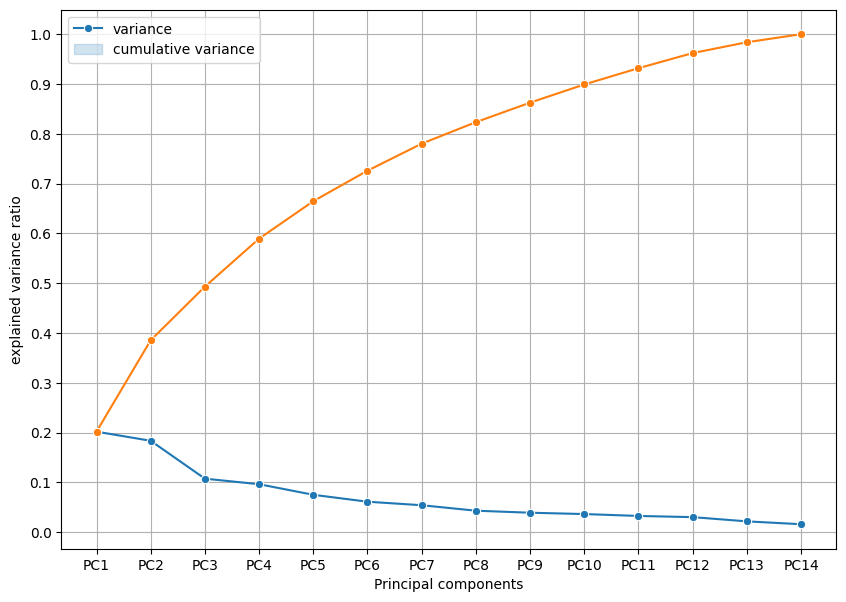

In [155]:
plot_evr_pca(X[genres])

2 components for genres

In [156]:
from sklearn.decomposition import PCA
genres_pca=PCA(n_components=2)
pca_transform=genres_pca.fit_transform(X[genres])
component_names = [f"PC{i+1}" for i in range(pca_transform.shape[1])]
pca_transform=pd.DataFrame(pca_transform, columns=component_names)
mi_scores(pca_transform,y)

PC2    0.082012
PC1    0.043647
Name: MI Scores, dtype: float64

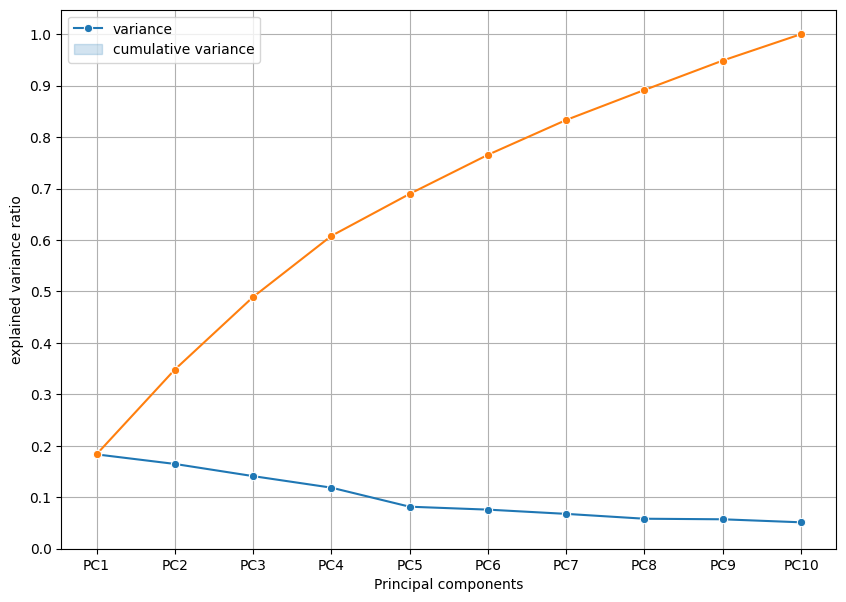

In [157]:
plot_evr_pca(X[companies])

4 components for companies

In [158]:
from sklearn.decomposition import PCA
comp_pca=PCA(n_components=4)
pca_transform=comp_pca.fit_transform(X[companies])
component_names = [f"PC{i+1}" for i in range(pca_transform.shape[1])]
pca_transform=pd.DataFrame(pca_transform, columns=component_names)
mi_scores(pca_transform,y)

PC4    0.118524
PC2    0.108579
PC3    0.107061
PC1    0.096524
Name: MI Scores, dtype: float64

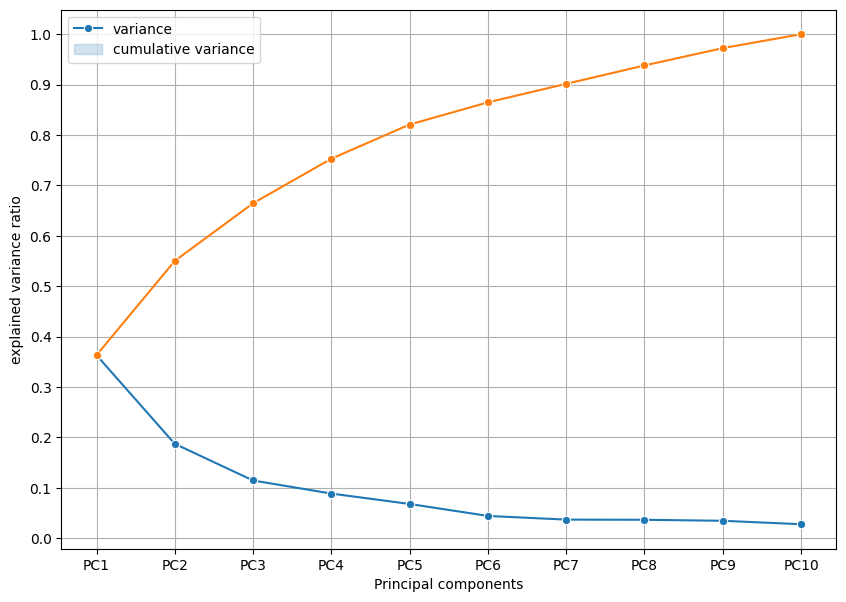

In [159]:
plot_evr_pca(X[countries])

1 component for countries

In [160]:
from sklearn.decomposition import PCA
countries_pca=PCA(n_components=1)
pca_transform=countries_pca.fit_transform(X[countries])
component_names = [f"PC{i+1}" for i in range(pca_transform.shape[1])]
pca_transform=pd.DataFrame(pca_transform, columns=component_names)
mi_scores(pca_transform,y)

PC1    0.070162
Name: MI Scores, dtype: float64

select the other features based on tree model feature importances

In [161]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0)
features=rf.fit(X.fillna(0),np.log1p(y)).feature_importances_
features=pd.DataFrame(features,columns=["tree_based_importance"], index=X.columns)
features.sort_values("tree_based_importance",ascending=False).head(10)

tree_based_importance
budget                          0.389202
popularity                      0.160685
date_year                       0.088991
runtime                         0.061825
date_dayofmonth                 0.041812
date_month                      0.024114
date_dayofweek                  0.021446
companies_sum                   0.018801
genres_sum                      0.015927
original_language               0.015736

we select the first 5 rows who has almost 5% or more

In [162]:
features = ["budget", "popularity", "runtime", "date_year",	"date_dayofmonth"]
pca_names=["GEN_PCA1", "GEN_PCA2"] + ["COMP_PCA1", "COMP_PCA2", "COMP_PCA3", "COMP_PCA4"] + ["COUN_PCA1"]

make a column tranasformer with feature selection

In [163]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
preprocessor = make_column_transformer(( StandardScaler(), features ),
                                       ( PCA(n_components=2), genres ),
                                       ( PCA(n_components=4), companies ),
                                       ( PCA(n_components=1), countries ),
                                       )

next we make a pipeline with missing impute, and feature selection, names transformer is to create a dataframe again after imputing

In [164]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

def remind_names(numpy_matrix,names):
  return pd.DataFrame(numpy_matrix,columns=names)

names = FunctionTransformer(lambda x: remind_names(x,names=X.columns))

pipe=Pipeline([( "imputer", SimpleImputer(strategy='median') ),
               ( "remind_names", names ),
               ( "preprocessor", preprocessor )
               ])
pipe=pipe.fit_transform(X)

we can see after feature selection, that the score is better than with all data

In [165]:
score_dataset(pipe,np.log1p(y))

2.0993 ± 0.1202


In [166]:
score_dataset(X.fillna(0),np.log1p(y))

2.1451 ± 0.1796


# **MODEL EVALUATION**

In [167]:
# show a summary dataframe of gridsearchCV results sorted by model's score
def show_results(fitted_grid,header=True):
  results = pd.DataFrame(fitted_grid.cv_results_)
  results = results.set_index("rank_test_score")
  results.mean_test_score = -results.mean_test_score
  results = results[["params","mean_test_score","std_test_score"]]
  if header:
    return results.sort_index().head()
  else:
    return results.sort_index()

In [168]:
# plot the learing curve of a model
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, scoring=None , ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    _, axes = plt.subplots(1, figsize=(11, 6))
    axes.set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, __, _ = \
        learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

## Linear models

elastic net covers both regularizations, and their combinations

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

enet_params={}
enet_params["alpha"] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
enet_params["l1_ratio"] = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
enet_params["max_iter"] = [1, 5, 10, 100, 1000]

grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
enet_grid = GridSearchCV(estimator=ElasticNet(random_state=0), param_grid=enet_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1)
enet_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


summary of results from all grid search

In [170]:
results = pd.DataFrame(enet_grid.cv_results_)
results = results.set_index("rank_test_score")
results.mean_test_score = -results.mean_test_score
results = results[["param_l1_ratio","params","mean_test_score","std_test_score"]]

### Ridge regression (L2 regularization)

with l1_ratio=0 we get l2 regularization

In [171]:
ridge = results[results.param_l1_ratio==0].sort_index()
ridge.head()

param_l1_ratio  \
rank_test_score                  
79                           0   
79                           0   
81                           0   
84                           0   
85                           0   

                                                            params  \
rank_test_score                                                      
79                {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 100}   
79               {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000}   
81                 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 10}   
84                  {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 5}   
85                 {'alpha': 0.01, 'l1_ratio': 0, 'max_iter': 100}   

                 mean_test_score  std_test_score  
rank_test_score                                   
79                      2.589908        0.158034  
79                      2.589908        0.158034  
81                      2.589908        0.158034  
84                      2.589954        0.157913  
85                      2.590026        0.159168

learning curve seems to have underfitting

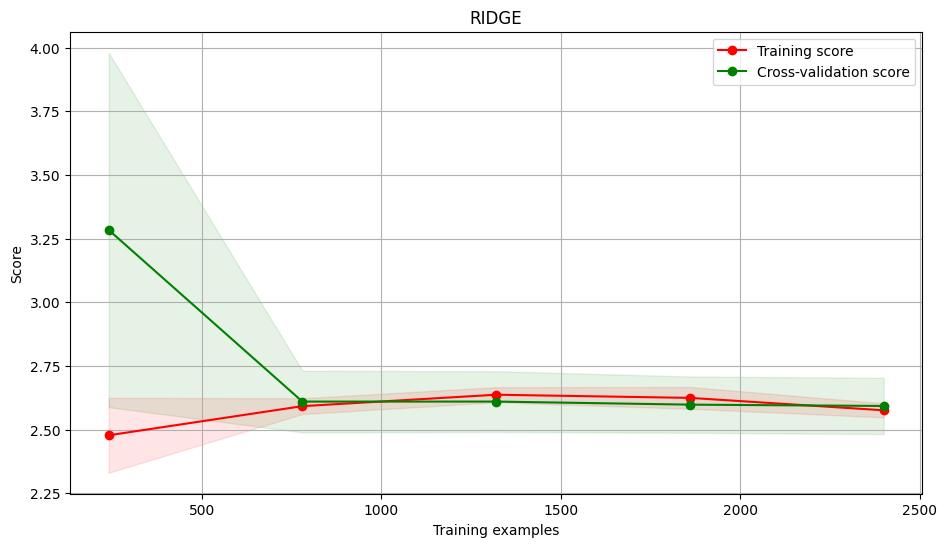

In [172]:
ridge_model=ElasticNet(alpha=0.001,l1_ratio=0,max_iter=100,tol=1)
plot_learning_curve(estimator=ridge_model, title="RIDGE", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

### Lasso regression (L1 regularization)


with l1_ratio=1 we get l1 regularization

In [173]:
lasso=results[results.param_l1_ratio==1].sort_index()
lasso.head()

param_l1_ratio  \
rank_test_score                  
1                            1   
1                            1   
1                            1   
4                            1   
36                           1   

                                                           params  \
rank_test_score                                                     
1                 {'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 100}   
1                  {'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 10}   
1                {'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 1000}   
4                   {'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 5}   
36                {'alpha': 0.001, 'l1_ratio': 1, 'max_iter': 10}   

                 mean_test_score  std_test_score  
rank_test_score                                   
1                       2.588782        0.160072  
1                       2.588782        0.160072  
1                       2.588782        0.160072  
4                       2.588793        0.159967  
36                      2.589734        0.158095

learning curve seems to have underfitting too

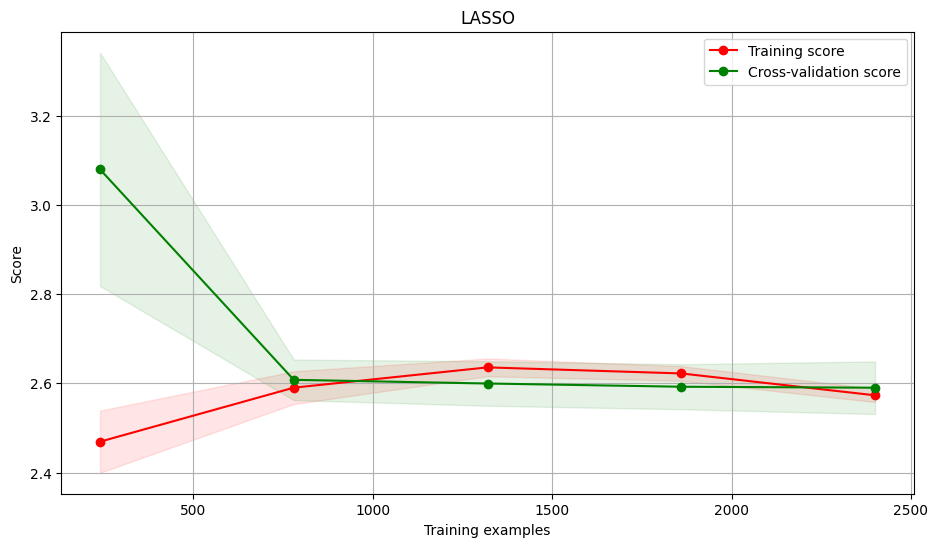

In [174]:
lasso_model=ElasticNet(alpha=0.01,l1_ratio=1,max_iter=100)
plot_learning_curve(estimator=lasso_model, title="LASSO", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

### Elastic net regression

best l1_ratio aparently is 0.9

In [175]:
enet=results[results.param_l1_ratio != 1]
enet=enet[enet.param_l1_ratio != 0]
enet=enet.sort_index()
enet.head()

param_l1_ratio  \
rank_test_score                  
5                          0.9   
5                          0.9   
5                          0.9   
8                          0.9   
9                          0.8   

                                                            params  \
rank_test_score                                                      
5                {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1...   
5                {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 100}   
5                 {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 10}   
8                  {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 5}   
9                {'alpha': 0.01, 'l1_ratio': 0.8, 'max_iter': 1...   

                 mean_test_score  std_test_score  
rank_test_score                                   
5                       2.588819        0.159911  
5                       2.588819        0.159911  
5                       2.588819        0.159911  
8                       2.588831        0.159808  
9                       2.588869        0.159760

but the score does not improve at all, our relationship of variables is not necessarily linear, so let's choose a more complex model to avoid underfitting

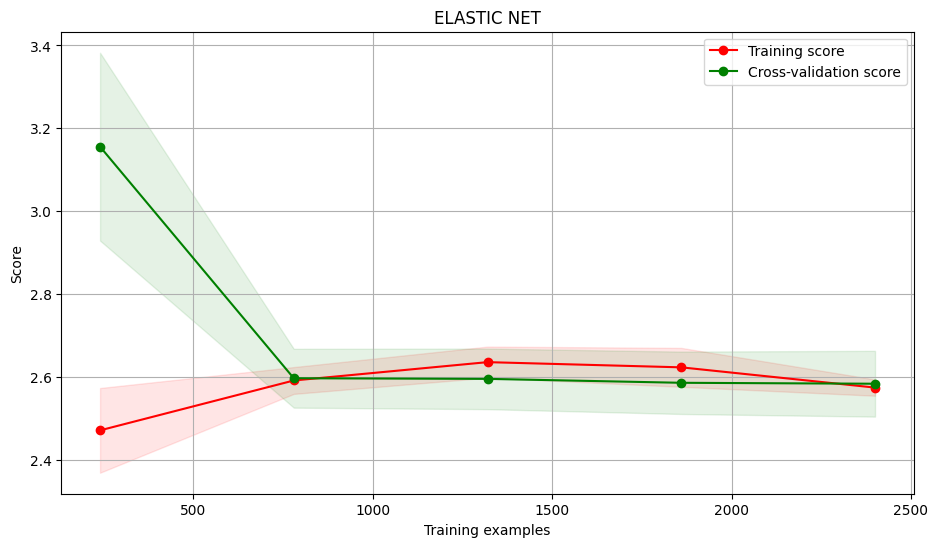

In [176]:
enet_model=ElasticNet(alpha=0.01,l1_ratio=0.9,max_iter=1000)
plot_learning_curve(estimator=enet_model, title="ELASTIC NET", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

## K-nearest neighbors regression

In [177]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import randint

knn_params = {
    'n_neighbors': randint(1, 10),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
knn_grid = RandomizedSearchCV(n_iter=500, estimator=KNeighborsRegressor(), param_distributions=knn_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1, random_state=0)
knn_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


the score improve because its a more complex model

In [178]:
show_results(knn_grid)

params  \
rank_test_score                                                      
1                {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}   
1                {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}   
1                {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}   
1                {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}   
1                {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}   

                 mean_test_score  std_test_score  
rank_test_score                                   
1                       2.389025          0.1368  
1                       2.389025          0.1368  
1                       2.389025          0.1368  
1                       2.389025          0.1368  
1                       2.389025          0.1368

but learning curve has too much overfitting, thats for largest value for n_neighbors hyperparameter

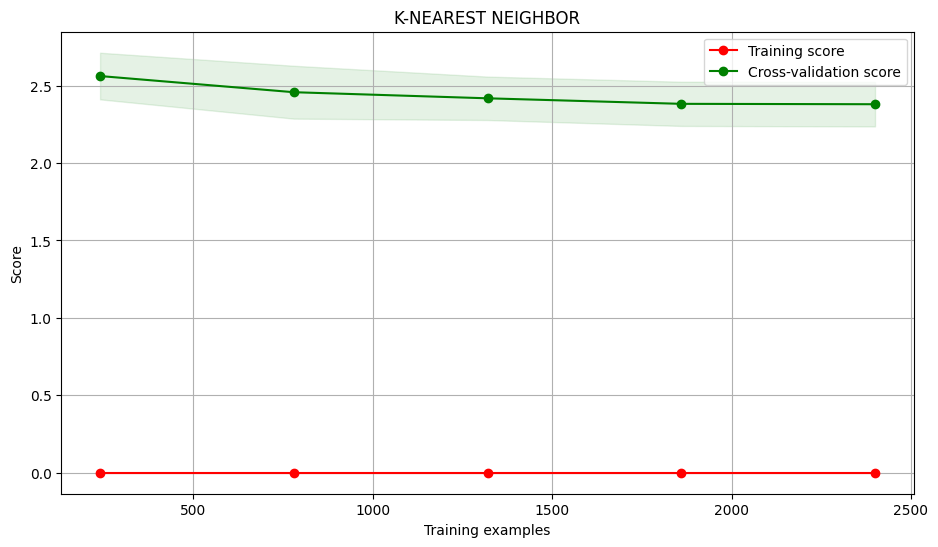

In [179]:
knn_model=knn_grid.best_estimator_
plot_learning_curve(estimator=knn_model, title="K-NEAREST NEIGHBOR", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

## Epsilon-support vector regression

In [180]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

svr_params={}
svr_params["kernel"] = ["linear", "rbf", "sigmoid"]
svr_params["gamma"] = [0.0001, 0.001, 0.01, 0.1, 10, "scale", "auto"]
svr_params["C"] = [0.1, 0.5, 1, 10, 50, 100]
svr_params["epsilon"] = [0, 0.01, 0.1, 0.5, 1, 2, 4]

grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
svr_grid = RandomizedSearchCV(n_iter=200 , estimator=SVR(), param_distributions=svr_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1,random_state=0)
svr_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


support vector regression is a bit better than knn

In [181]:
show_results(svr_grid)

params  \
rank_test_score                                                      
1                {'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 1, ...   
2                {'kernel': 'rbf', 'gamma': 'auto', 'epsilon': ...   
3                {'kernel': 'rbf', 'gamma': 'scale', 'epsilon':...   
4                {'kernel': 'rbf', 'gamma': 'auto', 'epsilon': ...   
5                {'kernel': 'rbf', 'gamma': 'scale', 'epsilon':...   

                 mean_test_score  std_test_score  
rank_test_score                                   
1                       2.305090        0.153419  
2                       2.323996        0.151946  
3                       2.328795        0.153070  
4                       2.332181        0.153507  
5                       2.345488        0.153344

learning curve has a correct shape, but deviation is wide in validation

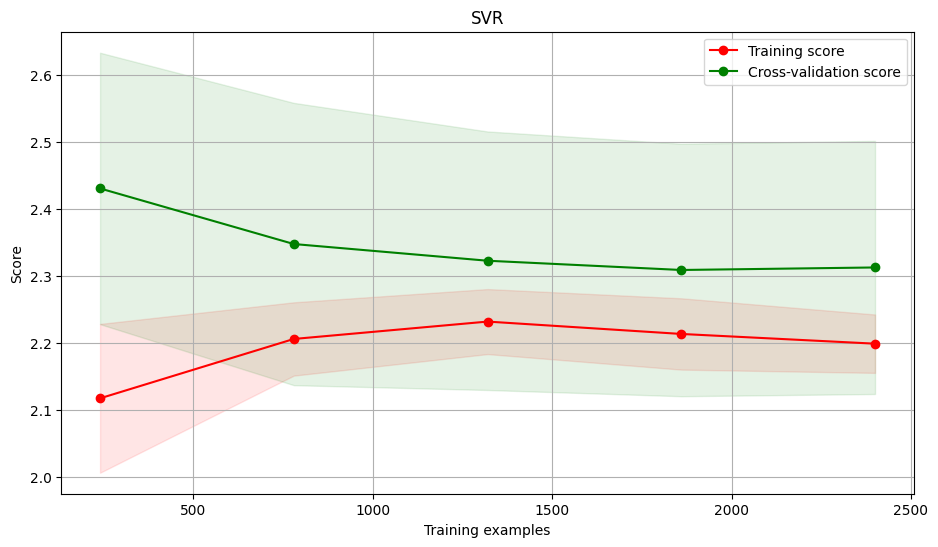

In [182]:
svr_model=svr_grid.best_estimator_
plot_learning_curve(estimator=svr_model, title="SVR", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

## Decision tree regressor

In [183]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

detree_params = {
    'criterion': ['squared_error', 'poisson', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
detree_grid = RandomizedSearchCV(n_iter=500, estimator=DecisionTreeRegressor(), param_distributions=detree_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1,random_state=1)
detree_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


decision tree its better than our previus models

In [184]:
show_results(detree_grid)

params  \
rank_test_score                                                      
1                {'splitter': 'best', 'min_samples_split': 10, ...   
2                {'splitter': 'best', 'min_samples_split': 10, ...   
3                {'splitter': 'best', 'min_samples_split': 10, ...   
4                {'splitter': 'best', 'min_samples_split': 5, '...   
5                {'splitter': 'best', 'min_samples_split': 5, '...   

                 mean_test_score  std_test_score  
rank_test_score                                   
1                       2.270864        0.129398  
2                       2.274315        0.149591  
3                       2.275735        0.130957  
4                       2.286700        0.143766  
5                       2.286700        0.143766

this is a perfect learning curve, doesn't have overfitting, and underfitting its not quite big, so let's see if random forest improve the score

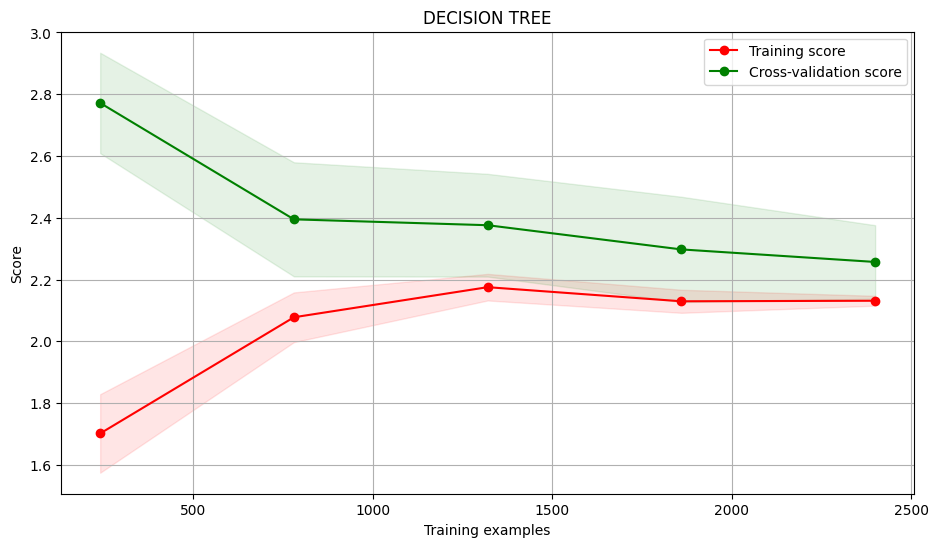

In [185]:
dt_model=detree_grid.best_estimator_
plot_learning_curve(estimator=dt_model, title="DECISION TREE", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

## Random forest regressor

In [186]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
rf_grid = RandomizedSearchCV(n_iter=200, estimator=RandomForestRegressor(), param_distributions=rf_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1,random_state=0)
rf_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


as I spected random forest its better than decision tree, so this is the best of all models

In [187]:
show_results(rf_grid)

params  \
rank_test_score                                                      
1                {'n_estimators': 200, 'min_samples_split': 10,...   
2                {'n_estimators': 300, 'min_samples_split': 5, ...   
3                {'n_estimators': 100, 'min_samples_split': 5, ...   
4                {'n_estimators': 300, 'min_samples_split': 10,...   
5                {'n_estimators': 300, 'min_samples_split': 10,...   

                 mean_test_score  std_test_score  
rank_test_score                                   
1                       2.099754        0.139085  
2                       2.099839        0.130961  
3                       2.099987        0.129943  
4                       2.100819        0.138162  
5                       2.100921        0.119368

it's learning curve seems to have some overfitting, but still being the best model

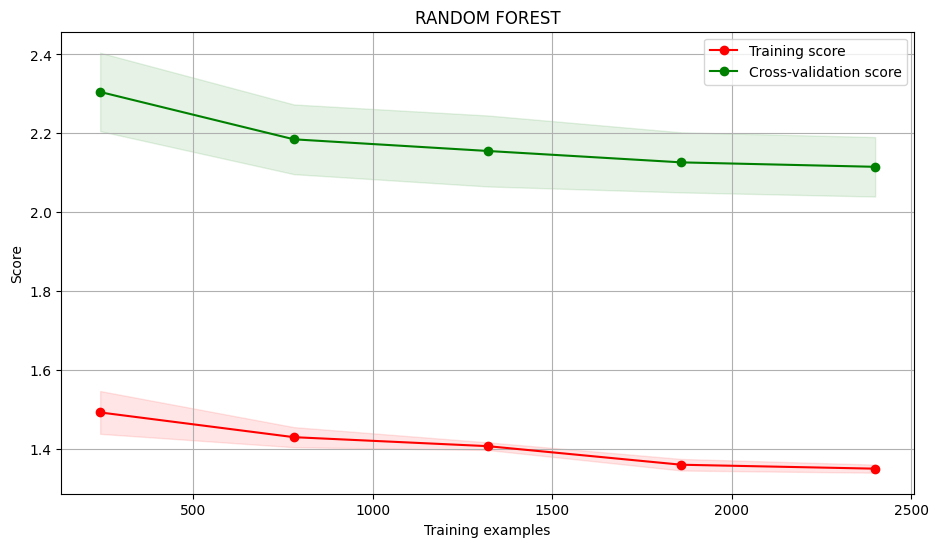

In [188]:
rf_model=rf_grid.best_estimator_
plot_learning_curve(estimator=rf_model, title="RANDOM FOREST", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

# **FINAL PIPELINE**

finally the entire proccess is resume in a single pipeline, with the best random forest model, and the transform dataset function to extract the information of dictionaries

In [189]:
final_pipe=Pipeline([( "transform_dataset", FunctionTransformer(transform_dataset) ),  # transform dataset to a readable way
                     ( "imputer", SimpleImputer(strategy='median') ),  # impute missing values with median
                     ( "remind_names", names ),  # recover the column names that lost after impute
                     ( "preprocessor", preprocessor ),  # feature selection and pca
                     ( "model", rf_model )  # random forest model with best hyperparameters
                    ])

training with the full dataset and making predictions

In [190]:
final_pipe.fit(train,np.log1p(y))  # train
predict = final_pipe.predict(test) # predict
predict = np.expm1(predict)  #inverse function of log1p to get valid predictions

valid format for submission

In [191]:
submission=pd.DataFrame(data=predict, index=test.index, columns=["revenue"])
submission.to_csv("submission.csv")
!head submission.csv

id,revenue
3001,1767159.0173677532
3002,1365563.6657505746
3003,11963516.801618844
3004,3835233.408423879
3005,681867.5541996164
3006,9919492.031223886
3007,2784904.708616044
3008,52521793.013812855
3009,8842319.317150323


after submission I obtain a score of 2.10, similar to cross-validation score so the entire process seems to be accurate

**competition score**

<img src='https://raw.githubusercontent.com/d0bando/Some_projects/main/clean_code_old_project_kaggle_competition/score.png'>